# The Power Domination Toolbox Version 2.0
#### Johnathan Koch, Applied Research Solutions,
#### Beth (Bjorkman) Morrison, Air Force Research Lab

The following listing comprises the Power Domination Toolbox. Each cell is prefaced by a description of what is contained in the following cell. Each function definition is followed by an example, if one is available, to demonstrate the function.

The first cell here makes sure that all the dependencies are installed in the correct order using the sys package inherent to python.

In [1]:
import sys
# if hasattr(sys, 'ps1') and __name__ == '__main__':
#     !{sys.executable} -m pip install --upgrade pip
#     !{sys.executable} -m pip install --upgrade Pillow
#     !{sys.executable} -m pip install scipy==1.10.1
#     !{sys.executable} -m pip install networkx==3.1
#     !{sys.executable} -m pip install numpy==1.24.2
#     !{sys.executable} -m pip install matplotlib==3.5.1
#     !{sys.executable} -m pip install sympy==1.12

The next cell ensures that all the required modules are loaded.

itertools is needed for the combinations method.

networkx is needed because graphs.

functools is needed for partials.

multiprocessing is needed so that the work can be completed on multiple cpus.

sympy is needed for symbolic arithmetic.

matplotlib is needed for specific drawing methods used.

numpy is needed for calculating axes labels in specific drawing methods.

Callable and Sequence from collections.abc are needed for argument type-checking.

In [2]:
import itertools as it
import networkx as nx
import functools
import multiprocessing
import sympy as sym
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from collections.abc import Callable, Sequence

Due to limitations for the Jupyter runtime environment and parallelization, we must import the toolbox script. We only do this when the detected environment is a notebook. In various examples, we will also use the statement ```hasattr(sys,'ps1')``` to determine if this script is being ran as a python file directly, or as a jupyter notebook.

In [3]:
if __name__ == '__main__' and hasattr(sys, 'ps1'):
    import powerdominationtoolbox as pdt

The following cells define some usefull graphs that will periodically be used as example graphs.

NewEnglandGraph is a representations of the New England power grid as available in the MATPOWER toolbox for MATLAB. The edges were extracted from "test_system_10gen.m" file directly with a text editor and exported to a networkx adjacency list.

As a note, we will use nx.draw_kamada_kawai() as the graph drawing function so as to be certain that the graph drawing is consistent between cells.

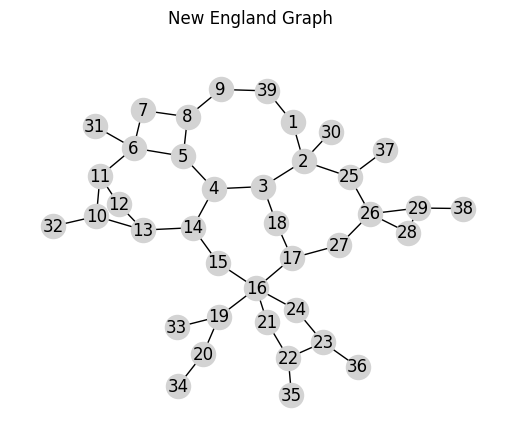

In [4]:
def NewEnglandGraph():
    return nx.parse_adjlist(['1 2 39', '2 3 25 30', '39 9', '3 4 18', '25 26 37', '4 5 14', '18 17', '5 6 8', '14 13 15', '6 7 11 31', '8 7 9', '11 10 12', '10 13 32', '13 12', '15 16', '16 17 19 21 24', '17 27', '19 20 33', '21 22', '24 23', '27 26', '20 34', '22 23 35', '23 36', '26 28 29', '28 29', '29 38'])

if __name__ == '__main__':
    fig,axes = plt.subplots(1,1)
    fig.suptitle('New England Graph')
    nx.draw_kamada_kawai(NewEnglandGraph(), node_color='lightgrey', with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

IEEE118 is a representation of the standard IEEE test system with 118 busses.

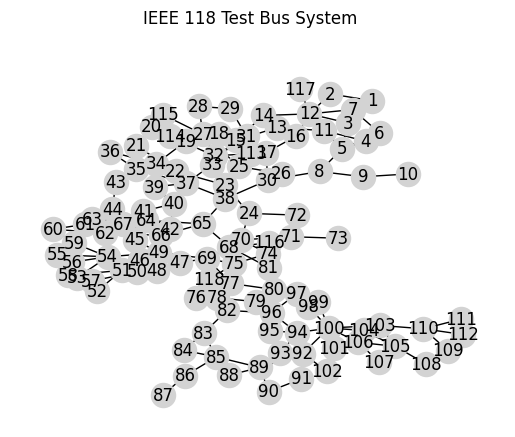

In [5]:
def IEEE118():
    return nx.parse_adjlist(['1 2 3', '2 12', '3 5 12', '4 5 11', '5 6 11 8', '6 7', '7 12', '8 9 30', '9 10', '11 12 13', '12 14 16 117', '13 15', '14 15', '15 17 19 33', '16 17', '17 18 31 113 30', '18 19', '19 20 34', '20 21', '21 22', '22 23', '23 24 25 32', '24 70 72', '25 27 26', '26 30', '27 28 32 115', '28 29', '29 31', '30 38', '31 32', '32 113 114', '33 37', '34 36 37 43', '35 36 37', '37 39 40 38', '38 65', '39 40', '40 41 42', '41 42', '42 49', '43 44', '44 45', '45 46 49', '46 47 48', '47 49 69', '48 49', '49 50 51 54 66 69', '50 57', '51 52 58', '52 53', '53 54', '54 55 56 59', '55 56 59', '56 57 58 59', '59 60 61 63', '60 61 62', '61 62 64', '62 66 67', '63 64', '64 65', '65 66 68', '66 67', '68 69 81 116', '69 70 75 77', '70 71 74 75', '71 72 73', '74 75', '75 77 118', '76 77 118', '77 78 80 82', '78 79', '79 80', '80 96 97 98 99 81', '82 83 96', '83 84 85', '84 85', '85 86 88 89', '86 87', '88 89', '89 90 92', '90 91', '91 92', '92 93 94 100 102', '93 94', '94 95 96 100', '95 96', '96 97', '98 100', '99 100', '100 101 103 104 106', '101 102', '103 104 105 110', '104 105', '105 106 107 108', '106 107', '108 109', '109 110', '110 111 112', '114 115'])

if __name__ == '__main__':
    fig,axes = plt.subplots(1,1)
    fig.suptitle('IEEE 118 Test Bus System')
    nx.draw_kamada_kawai(IEEE118(), node_color='lightgrey', with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

ZimGraph is an example graph for demonstrating particular methods and their use in the overall program.

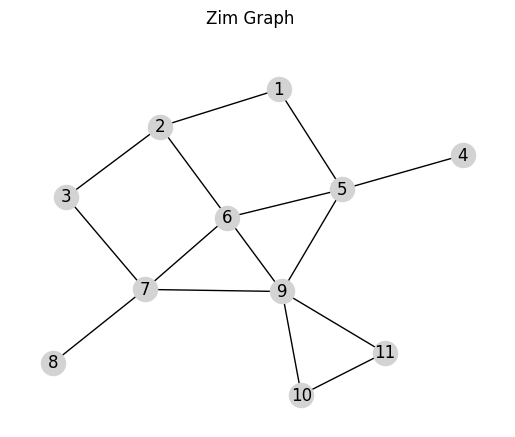

In [6]:
def ZimGraph():
    return nx.parse_adjlist(['1 2 5', '2 3 6', '3 7', '4 5', '5 6 9', '6 7 9', '7 8 9', '9 10 11', '10 11'])

if __name__ == '__main__':
    fig,axes = plt.subplots(1,1)
    fig.suptitle('Zim Graph')
    nx.draw_kamada_kawai(ZimGraph(), node_color='lightgrey', with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

ExtendedZimGraph is a modification of the ZimGraph with extended terminal paths and cycles.

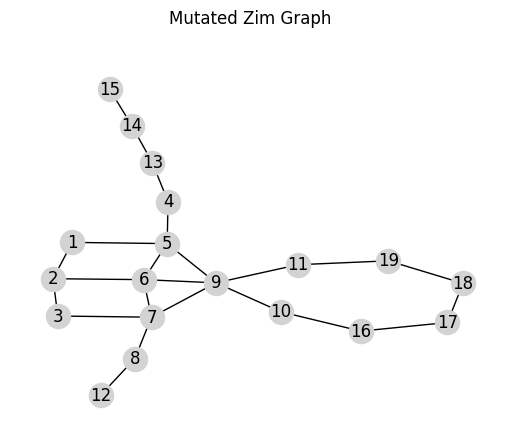

In [7]:
def MutatedZimGraph():
    return nx.parse_adjlist(['1 2 5', '2 6 3', '5 4 6 9', '6 7 9', '3 7', '7 8 9', '15 14', '14 13', '13 4', '9 10 11', '8 12', '10 16', '11 19', '16 17', '19 18', '17 18'])

if __name__ == '__main__':
    fig,axes = plt.subplots(1,1)
    fig.suptitle('Mutated Zim Graph')
    nx.draw_kamada_kawai(MutatedZimGraph(), node_color='lightgrey', with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

BarbellGraph is a classical graph that is 2K_4 connected by a P_4.

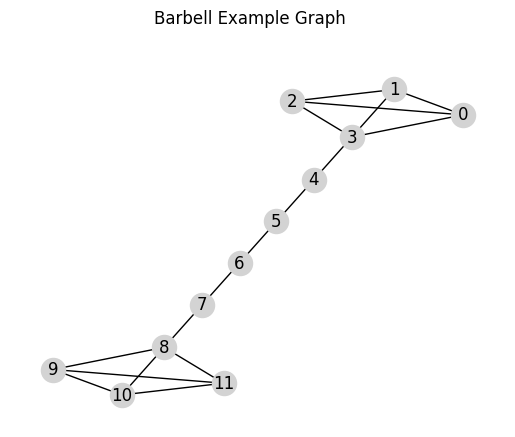

In [8]:
def BarbellGraph():
    return nx.parse_adjlist(['0 1 2 3', '1 2 3', '2 3', '3 4', '4 5', '5 6', '6 7', '7 8', '8 9 10 11', '9 10 11', '10 11'])

if __name__ == '__main__':
    fig,axes = plt.subplots(1,1)
    fig.suptitle('Barbell Example Graph')
    nx.draw_kamada_kawai(BarbellGraph(), node_color='lightgrey', with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The crab graph is classified as a $K_3$ with 2 vertices each with an additional 2 leaves attached.

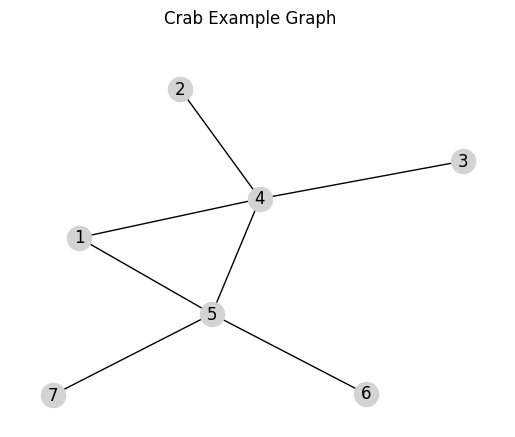

In [9]:
def CrabGraph():
    return nx.parse_adjlist(['3 4', '2 4', '4 5 1', '5 7 6 1'])

if __name__ == '__main__':
    fig,axes = plt.subplots(1,1)
    fig.suptitle('Crab Example Graph')
    nx.draw_kamada_kawai(CrabGraph(), node_color='lightgrey', with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

Below is the redesigned zeros game function. The inputs are a networkx graph, and a list of vertices within this graph to be initially colored blue (SeedSet). As a note, SeedSet is a list of whichever data type the vertices in the graph are. If node names are strings, then SeedSet must be a list of strings, if node names are tuples, then SeedSet must be a list of tuples.

Propagation continues as follows:

If a colored vertex is adjacent to exactly one uncolored vertex, the uncolored vertex becomes colored. This Propagation continues until either the entire graph is colored or no other vertices can be colored.

This function is a rewrite of the function found at https://github.com/jasongrout/minimum_rank/blob/master/minrank.py entitled "zerosgame" with variable names changed for clarity, as well as commentary to match other methods in this toolbox.

In [10]:
def ZeroForce(Input_graph:nx.classes.graph=nx.null_graph(), SeedSet:Sequence=list()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to play the zero forcing game on
    SeedSet - a list object containing networkx vertex objects
      This is used as the initially colored vertices
    
    OUTPUT
    
    Blues - a set object containing networkx vertex objects
      This is the result after propagating the seed set until no more propagating steps can be taken
    '''

    #To implement zero forcing the algorithm needs to keep track of active, inactive, and neighbors of blue vertices
    NewBlues = set(SeedSet) if SeedSet else set()
    Blues = set()
    BlueNeighbors = {}
    ActiveBlues = set()
    InactiveBlues = set()
    
    #To be sure we try to zero force at least once, we set the flag for coloring to true
    HaveColored = True
    
    while HaveColored:
        
        #Now we continue zero forcing until we don't color any vertices
        HaveColored = False
        
        #Now we update the set of blues with the vertices colored in the last iteration of the loop
        Blues.update(NewBlues)
        ActiveBlues.update(NewBlues)
        ActiveBlues.difference_update(InactiveBlues)
        
        #Now we update the list of neighbors to blue vertices and clear the NewBlues and InactiveBlues for this iteration
        BlueNeighbors.update([[Vertex, set(Input_graph.neighbors(Vertex)).difference(Blues)] for Vertex in NewBlues])
        NewBlues.clear()
        InactiveBlues.clear()
        
        #Now we check if any of the active blue vertices can zero force
        for Vertex in ActiveBlues:
            BlueNeighbors[Vertex].difference_update(Blues)
            
            #If the vertex has exactly one uncolored neighbor, then we flag it for coloring and set the flag that we have colored in this iteration of the loop
            if len(BlueNeighbors[Vertex]) == 1:
                NewBlues.add(BlueNeighbors[Vertex].pop())
                InactiveBlues.add(Vertex)
                HaveColored = True
                
    return Blues

To demonstrate ZeroForce, we will start with two adjacent vertices of a cycle graph colored blue. This then results in the entire graph being colored.

The initial seed set is ['0', '1', '2'], and after propagating the set of blue vertices is {'1', '3', '5', '6', '8', '2', '4', '0', '7'}. The following graph indicates the initial set (yellow), blue vertices resulting from zero-forcing (light blue), and non-blue vertices (light grey)


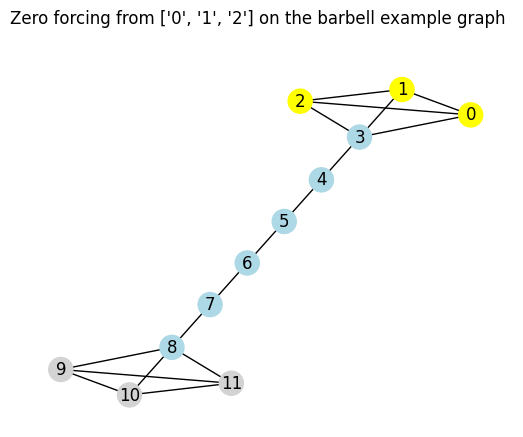

In [11]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    SeedSet = ["0", "1", "2"]

    EndSet = ZeroForce(ExampleGraph, SeedSet)

    print(f"The initial seed set is {SeedSet}, and after propagating the set of blue vertices is {EndSet}. The following graph indicates the initial set (yellow), blue vertices resulting from zero-forcing (light blue), and non-blue vertices (light grey)")

    ColorMap = [
        "yellow" if vertex in SeedSet
        else
            "lightblue" if vertex in EndSet else
            "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Zero forcing from {SeedSet} on the barbell example graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels=True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The closed neighborhood of a set of vertices is defined to be the set of neighbors of vertices in the given set, unioned with the given set itself.

In [12]:
def closed_neighborhood(Input_graph:nx.classes.graph=nx.null_graph(), Vertices:Sequence=list()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    Vertices - an iterable of vertices in Input_graph
      This is the vertex set under inspection
    
    OUTPUT
    
    a set - this is the set of Vertices unioned with neighbors of vertices in Vertices
    '''

    return set(vertex for vertex in it.chain(*(nx.neighbors(Input_graph, vertex) for vertex in Vertices), Vertices))

The closed neighborhood of vertex 0 is given below as example.

The closed neighborhood of ['0'] is {'1', '3', '0', '2'}.


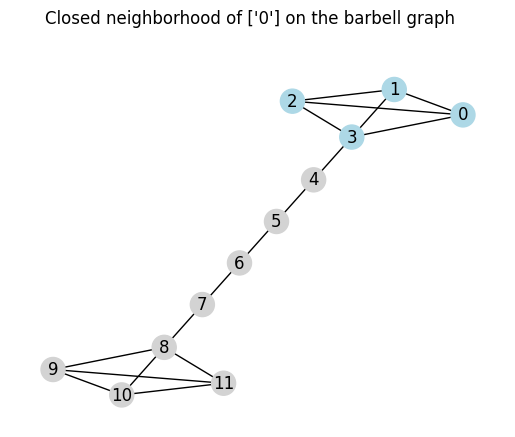

In [13]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    SeedSet = ["0"]

    EndSet = closed_neighborhood(ExampleGraph, SeedSet)

    print(f'The closed neighborhood of {SeedSet} is {EndSet}.')
    
    ColorMap = [
        "lightblue" if vertex in EndSet else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Closed neighborhood of {SeedSet} on the barbell graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The following function, Dominate, has been restructured to use the function closed_neighborhood

In [14]:
def Dominate(Input_graph:nx.classes.graph=nx.null_graph(), SeedSet:Sequence=set()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to power dominate on
    SeedSet - a set object containing networkx vertex objects
      This is used as the initially colored vertices (before the domination step)
    
    OUTPUT
    
    - a set object containing networkx vertex objects
      This is the set of vertices in SeedSet, and their neighbors, i.e. the closed neighborhood of SeedSet
    '''

    return closed_neighborhood(Input_graph, SeedSet)

To demonstrate Dominate, we observe that dominating on a single node in the clique of the barbell graph, the entire clique is colored blue.

With the input of ['0'], the domination step yields {'1', '3', '0', '2'} on the barbell example graph. The following graph indicates the initial set (yellow), blue vertices resulting from dominating (light blue), and non-blue vertices (light grey)


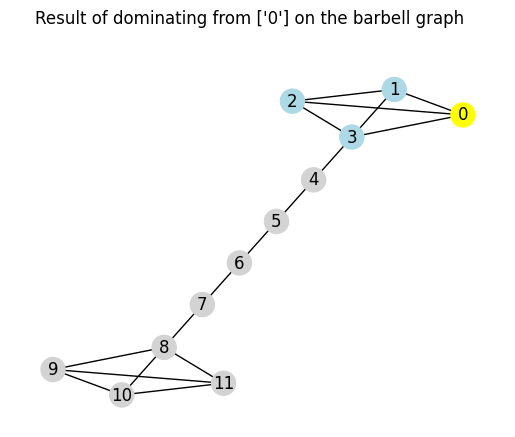

In [15]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    SeedSet = ["0"]

    EndSet = Dominate(ExampleGraph, SeedSet)

    print(f"With the input of {SeedSet}, the domination step yields {EndSet} on the barbell example graph. The following graph indicates the initial set (yellow), blue vertices resulting from dominating (light blue), and non-blue vertices (light grey)")
    
    ColorMap = [
        "yellow" if vertex in SeedSet
        else
            "lightblue" if vertex in EndSet else
            "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Result of dominating from {SeedSet} on the barbell graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The following function, PowerDominate, is updated such that the comments reflect the correct objects that are returned.

In [16]:
def PowerDominate(Input_graph:nx.classes.graph=nx.null_graph(), SeedSet:Sequence=set()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to power dominate on
    SeedSet - a set object containing networkx vertex objects
      This is used as the initially colored vertices (before the domination step)
    
    OUTPUT
    
    Blues - a set object containing networkx vertex objects
    a set of vertices that are the result of power domination on the input graph with the input seed set
    '''

    #First, color the initial set of vertices to start with
    Blues = list(SeedSet)
    
    #Second, color the neighbors of the initial set of vertices (domination step)
    DominatedBlues = Dominate(Input_graph, Blues)
        
    #Third, we play the zero forcing game
    Blues = ZeroForce(Input_graph, DominatedBlues)
    
    return Blues

To demonstrate PowerDominate, we observe that power dominating on a single node in the clique of the barbell graph, the entire clique is colored blue, as well as the long path.

With the input of ['0'], the power domination algorithm yields {'1', '3', '5', '6', '8', '2', '4', '0', '7'} on the barbell example graph. The following graph indicates the initial set (yellow), blue vertices resulting from power dominating (light blue), and non-blue vertices (light grey)


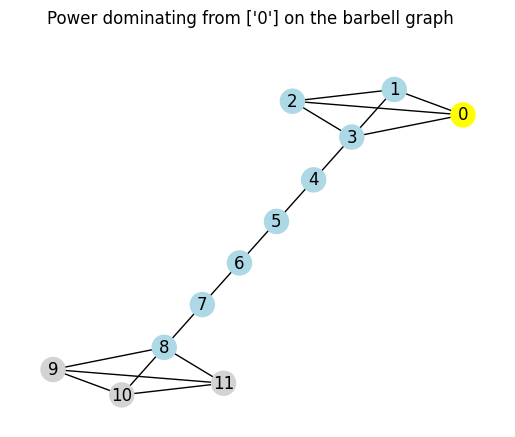

In [17]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    SeedSet = ["0"]

    EndSet = PowerDominate(ExampleGraph, SeedSet)

    print(f"With the input of {SeedSet}, the power domination algorithm yields {EndSet} on the barbell example graph. The following graph indicates the initial set (yellow), blue vertices resulting from power dominating (light blue), and non-blue vertices (light grey)")
    
    ColorMap = [
        "yellow" if vertex in SeedSet
        else
            "lightblue" if vertex in EndSet else
            "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Power dominating from {SeedSet} on the barbell graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The following function, isPDS, has been modified to entrance a keyword-only argument that controls whether the input placement is given as a return value. This is used in the new implementation of parallel methods.

In [18]:
def isPDS(Input_graph:nx.classes.graph=nx.null_graph(), Pmu_placement:Sequence=set(), **kwargs):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to power dominate on
    Pmu_placement - a set object containing networkx vertex objects
      This is used as the initially colored vertices (before the domination step)
    
    Keyword arguments
    'Return_placement' - a boolean
      if this is set to true, then the initial set will be returned as well as the truth value of the set being a power dominating set
    
    OUTPUT
    
    depending on the keyword argument 'Return_placement', the truth value of being a power domianting set and the set is returned
    '''

    #First, color the initial set of vertices to start with
    Blues = list(Pmu_placement)
    
    #Second, color the neighbors of the initial set of vertices (domination step)
    DominatedBlues = Dominate(Input_graph, Blues)
        
    #Third, we play the zero forcing game
    Blues = ZeroForce(Input_graph, DominatedBlues)

    #Now if the entire graph is blue, then we found a power dominating set!
    if len(Blues) == Input_graph.number_of_nodes():
        truth_value = True
    else:
        truth_value = False

    if kwargs.get('Return_placement', False) == True:
        return truth_value, Pmu_placement
    else:
        return truth_value

To demonstrate isPDS, we observe a vertex in one of the cliques of the barbell graph is not a power dominating set, while a vertex in each of the cliques is a power dominating set.

In [19]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    SeedSet = ["0"]

    print(f"{SeedSet} is {'' if isPDS(ExampleGraph, SeedSet) else 'not '}a power dominating set of the barbell graph.")

    SeedSet = ["0","11"]

    print(f"{SeedSet} is {'' if isPDS(ExampleGraph, SeedSet) else 'not '}a power dominating set of the barbell graph.")

['0'] is not a power dominating set of the barbell graph.
['0', '11'] is a power dominating set of the barbell graph.


We now have the logic to implement to implement the simplest version of a search for a minimum power dominating set.

In [20]:
def JLBW_minpds(Input_graph:nx.classes.graph=nx.null_graph()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    
    OUTPUT
    
    placement - a list of vertex labels
      This is a minimum power dominating set
    '''

    # For each placement size
    for number_of_nodes in range(1,Input_graph.number_of_nodes()+1,1):

        # For each placement
        for placement in it.combinations(Input_graph.nodes(), number_of_nodes):

            # If the placement is a power dominating set
            if isPDS(Input_graph, placement):

                # We return the placement
                return list(placement)

Notice the minimum power dominating set of the Zim graph as determined by this algorithm, and how there is a PMU on a degree 2 vertex.

['1', '9'] is a minimum power dominating set of the Zim graph.


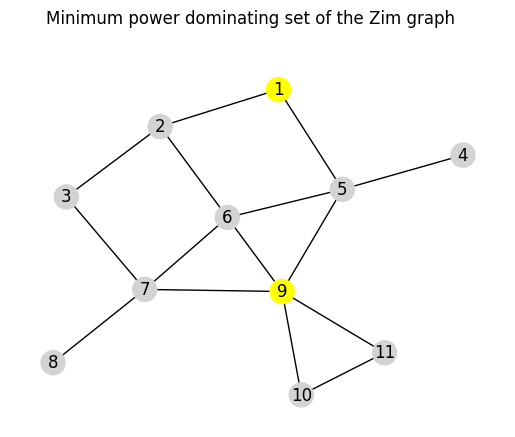

In [21]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    PDS = JLBW_minpds(ExampleGraph)

    print(f"{PDS} is a minimum power dominating set of the Zim graph.")
    
    ColorMap = [
        "yellow" if vertex in PDS else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Minimum power dominating set of the Zim graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

We now include a function that allows power domination to be done on a graph that already has blue vertices.

In [22]:
def power_dominate_partial(Input_graph:nx.classes.graph=nx.null_graph(), New_pmus:Sequence=list(), Blues:Sequence=list()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    New_pmus - a list of vertices that will be given PMUs
      These vertices will be given PMUs, so they are allowed to power dominate on the graph
    Blues - an iterable of vertices 
      These are vertices that are already blue in the graph for any reason, they are only allowed to zero force
    
    OUTPUT
    
    a set of vertices containing blue vertices when power dominating from New_pmus and having vertices in Blues already blue on the graph
    '''

    return ZeroForce(Input_graph, it.chain(Dominate(Input_graph, New_pmus), Blues))

To observe power_dominate_partial, see that if one of the vertices in the terminal triangle of the Zim graph, vertex 2 observes the entire graph.

With a PMU on ['2'] and ['10'] already colored blue, {'1', '3', '5', '6', '8', '2', '10', '4', '9', '11', '7'} is observed via the power domination process


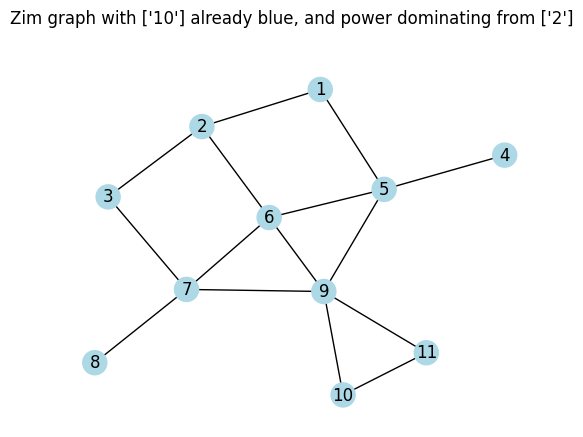

In [23]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    SeedSet = ["2"]
    Blues = ["10"]

    EndSet = power_dominate_partial(ExampleGraph, SeedSet, Blues)

    print(f"With a PMU on {SeedSet} and {Blues} already colored blue, {EndSet} is observed via the power domination process")
    
    ColorMap = [
        "lightblue" if vertex in EndSet else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Zim graph with {Blues} already blue, and power dominating from {SeedSet}')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

To implement the parallel check, we compile the previous function into one not unlike isPDS, that returns whether or not a given set forms a power dominating set of the graph in conjunction with the blue vertices already on the graph.

In [24]:
def is_PDS_partial(Input_graph:nx.classes.graph=nx.null_graph(), New_pmus:Sequence=list(), Blues:Sequence=list(), **kwargs):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    New_pmus - a list of vertices that will be given PMUs
      These vertices will be given PMUs, so they are allowed to power dominate on the graph
    Blues - an iterable of vertices 
      These are vertices that are already blue in the graph for any reason, they are only allowed to zero force
    
    Keyword arguments
    'Return_placement' - a boolean
      if this is set to true, then the initial set will be returned as well as the truth value of the set being a power dominating set
    
    
    OUTPUT
    depending on the keyword argument 'Return_placement', the truth value of being a power domianting set and the set is returned
      This is an extension of power_dominate_partial that returns true if the added PMU locations form a power dominating set and false otherwise
    '''

    Blues = power_dominate_partial(Input_graph, New_pmus, Blues)

    #Now if the entire graph is blue, then we found a power dominating set!
    if set(Blues) == set(Input_graph.nodes()):
        truth_value = True
    else:
        truth_value = False

    if kwargs.get('Return_placement', False) == True:
        return truth_value, New_pmus
    else:
        return truth_value

We observe, again, that the vertex 2 forms a power dominating set of the Zim graph when 10 is already colored blue.

In [25]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    SeedSet = ["2"]
    Blues = ["10"]

    truth_value = is_PDS_partial(ExampleGraph, SeedSet, Blues)

    print(f"With a PMU on {SeedSet} and {Blues} already colored blue, is_PDS_partial returns: {truth_value}")

With a PMU on ['2'] and ['10'] already colored blue, is_PDS_partial returns: True


The following is a re-implication of the graph contraction, with the alteration that this function now contracts internal paths to a single degree 2 vertex.

In [26]:
def ContractGraph(Input_graph:nx.classes.graph.Graph=nx.null_graph()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    
    OUTPUT
    
    graph - a networkx graph object
      This is a copy of the input graph with as many contractions applied as possible without altering the power domination structure.
    '''
    
    # The graph with no vertices nor edges cannot be contracted, so return the graph with no vertices nor edges.
    if nx.is_isomorphic(Input_graph, nx.null_graph()):
        return Input_graph

    # If the input graph is not connected, contract each of the connected components individually.
    if not nx.is_connected(Input_graph):
        return nx.union_all(ContractGraph(Input_graph.subgraph(connected_component)) for connected_component in nx.connected_components(Input_graph))

    # We make a copy of the input graph, to ensure that no modifications are made to the original graph.
    graph = Input_graph.copy()
    
    # We only want to inspect vertices degree 1 or 2
    low_degree_vertices = set(node for node,degree in graph.degree() if degree < 3)

    # If the graph has vertices degree 3 or higher, then it is not a path nor a cycle.
    if any((degree >= 3) for node, degree in graph.degree()):
        
        # We collect the vertices with degree 1 or 2, and generate the vertex-induced subgraph from this set.
        low_degree_subgraph = nx.subgraph(graph, low_degree_vertices)
        low_degree_boundary = set(node for node in low_degree_subgraph.nodes() if graph.degree(node) > low_degree_subgraph.degree(node))

        # We iterate over each of the connected components in the subgraph induced on vertices with degree 1 or 2 so as to ensure that we do not alter the zero forcing step.
        for component_vertices in list(nx.connected_components(low_degree_subgraph)):

            # If there are more than 1 vertices in this component, then the component is not a leaf.
            if len(component_vertices) > 1:

                # We now collect vertices with degree 1 or 2 that are connected to vertices with degree 3 or higher.
                component_boundary = list(component_vertices.intersection(low_degree_boundary)) 
                
                # If there are exactly 2 such vertices, then the component under inspection is not a terminal path.
                if len(component_boundary) == 2:
                    
                    # We now collect vertices degree 3 or higher that are adjacent to vertices in this component.
                    component_entrance = set()
                    [[component_entrance.add(neighbor) for neighbor in graph.neighbors(node) if neighbor not in component_vertices] for node in component_boundary]
                    
                    # If there are exactly 2 such vertices, then the component under inspection is not a terminal cycle.
                    if len(component_entrance) == 2:
                        
                        # We can remove one of the boundary vertices (vertex u), once we ensure that the other boundary vertex (vertex v), is adjacent to the entrance of vertex u.
                        graph.add_edge(component_boundary[0], component_entrance.pop())
                        graph.add_edge(component_boundary[0], component_entrance.pop())
                        graph.remove_node(component_boundary[1])
                    
                    # If there are not 2 such vertices, then there must be a unique vertex in the entrance of this component.
                    else:
                        
                        # We cannot remove either of the boundary vertices, but we ensure that they are adjacent.
                        graph.add_edge(component_boundary[0], component_boundary[1])

                # Once the boundary vertices are inspected, we can remove all non-boundary vertices.
                [graph.remove_node(node) for node in component_vertices if node not in low_degree_boundary]
    
    # If all the vertices are degree 0, 1, or 2, return a graph with 1 vertex and 0 edges because the input graph is an isolated vertex, a path or a cycle.
    else:

        # To do this, we take a graph with 0 vertices and 0 edges, and add the first vertex from the input graph.
        graph = nx.null_graph()
        graph.add_node(next(iter(Input_graph.nodes())))

    # The graph is now contracted and may be returned.
    return graph

View the following example of how this version of a graph contraction removes more vertices.

The barbell graph on the left and the contracted barbell graph contracted on the right


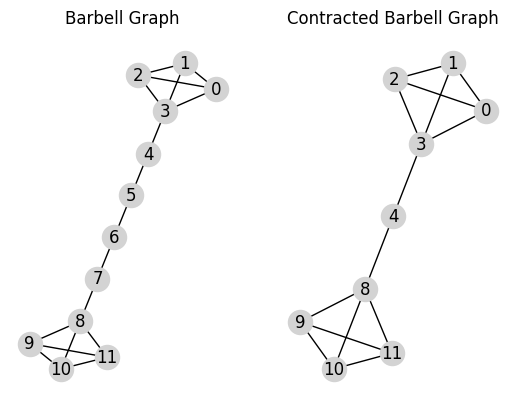

In [27]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()
    fix,axes = plt.subplots(1,2)
    axes[0].set_title('Barbell Graph')
    axes[1].set_title('Contracted Barbell Graph')
    print("The barbell graph on the left and the contracted barbell graph contracted on the right")

    nx.draw_kamada_kawai(ExampleGraph, node_color='lightgrey', with_labels = True,ax=axes[0])
    nx.draw_kamada_kawai(ContractGraph(ExampleGraph), node_color='lightgrey', with_labels = True,ax=axes[1])
    
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The following function is leveraged when determining Pref($G$) in a quicker manner.

In [28]:
def hasTwoLeaves(Input_graph:nx.classes.graph=nx.null_graph(), Vertex=None):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is the graph under inspection
    Vertex - a vertex contained in Input_graph
      This is the vertex under inspection
    
    OUTPUT
    
    True or False, depending on whether the the given vertex is adjacent to at least 2 vertices of degree 1 (leaves).
    '''

    # If the vertex is not in the graph, we return false
    if Vertex not in Input_graph:
        return False
    
    # We count the number of neighbors of the input vertex that have degree one
    if sum(1 for neighbor in Input_graph.neighbors(Vertex) if Input_graph.degree(neighbor) == 1) > 1:
        return True
    else:
        return False

To demonstrate this, view that vertex 4 of the crab graph has two leaves.

hasTwoLeaves returns True with 4 as input.


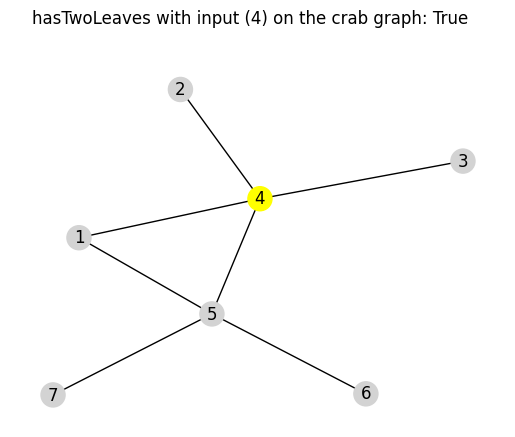

In [29]:
if __name__ == '__main__':
    ExampleGraph = CrabGraph()
    
    Vertex = '4'
    
    truth_value = hasTwoLeaves(ExampleGraph, Vertex)
    
    print(f'hasTwoLeaves returns {truth_value} with {Vertex} as input.')

    ColorMap = [
        "yellow" if vertex is Vertex else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'hasTwoLeaves with input ({Vertex}) on the crab graph: {truth_value}')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

We now encapsulate the notion of f-preferred vertices with the following function.

In [30]:
def pdDeletedComponent(Input_graph:nx.classes.graph=nx.null_graph(), Vertex=None):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is the graph under inspection
    Vertex - a vertex contained in Input_graph
      This is the vertex under inspection
    
    OUTPUT
    
    True or False, depending on whether the the given vertex power dominates at least one of the connected components that is not an isolated vertex in the vertex deleted subgraph.
    '''

    # If the vertex is not in the graph, we return false
    if Vertex not in Input_graph:
        return False

    # We calculate the blue vertices when power dominating from the set including only the input vertex.
    blues = PowerDominate(Input_graph, (Vertex,))

    # We determine the vertex deleted subgraph.
    vertex_deleted_subgraph = Input_graph.copy()
    vertex_deleted_subgraph.remove_node(Vertex)

    # If any of the connected components of the vertex deleted subgraph is a subset of the blue vertices determined by power dominating from the input vertex, then we can return true.
    if any(component.issubset(blues) for component in nx.connected_components(vertex_deleted_subgraph) if len(component) > 1):
        return True
    else:
        return False

Notice that since $\{10,11\}$ is an observed component of the vertex deleted subgraph of the Zim Graph minus vertex 9, pdDeletedComponent returns True. 

pdDeletedComponent returns True with 9 as input.


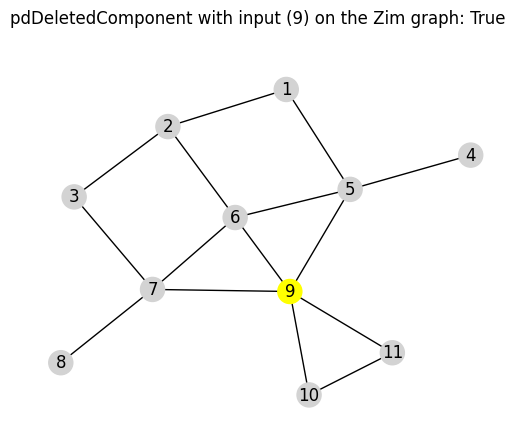

In [31]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()
    
    Vertex = '9'
    
    truth_value = pdDeletedComponent(ExampleGraph, Vertex)
    
    print(f'pdDeletedComponent returns {truth_value} with {Vertex} as input.')

    ColorMap = [
        "yellow" if vertex is Vertex else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'pdDeletedComponent with input ({Vertex}) on the Zim graph: {truth_value}')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The previous 2 functions combine into the following algorithm that determins preferred vertices.

In [32]:
def Pref(Input_graph:nx.classes.graph=nx.null_graph(), Contracted:bool=False):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    Contracted - a boolean
      This is a flag to indicate whether the graph has already been contracted with ContractGraph already or not. We leverage the fact that all terminal paths are contracted to leaves, and so we must ensure that the graph has been contracted.
    
    OUTPUT
    
    preferred_vertices
      This is a list of vertices that have more than one terminal paths, and/or power dominate one of the connected components of the vertex deleted subgraph.
    '''
    
    # If the graph has not yet been contracted, we must apply ContractGraph to it.
    if not Contracted:
        Input_graph = ContractGraph(Input_graph)

    # Then we start to biuld the list of preferred vertices
    preferred_vertices = list()

    # Each preferred vertex will be a cut vertex (articulation point)
    for vertex in nx.articulation_points(Input_graph):

        # b-preferred vertices are always in the set of preferred vertices
        if hasTwoLeaves(Input_graph, vertex):
            preferred_vertices.append(vertex)

        # If the vertex is not b-preferred, we check if it power dominates one of the connected components of the vertex deleted subgraph.
        elif pdDeletedComponent(Input_graph, vertex):

            # As described, there may be multiple f-preferred vertices with overlaping forts for which they power dominate. In this case, we check if the first located f-preferred vertex if it is a power dominating set by itself.
            if not preferred_vertices:
                if isPDS(Input_graph, [vertex,]):
                    # If the vertex is a p preferred vertex, then we return a list with that singleton vertex.
                    return [vertex,]

            # If the f-preferred vertex is not a p-preferred vertex, then we add it to the list of preferred vertices.
            preferred_vertices.append(vertex)

    # Once all cut vertices are inspected, we can return all b-preferred vertices and all f-preferred vertices that are not p-preferred vertices.
    return preferred_vertices

Observe that there are 3 vertices in Pref(New England power grid)

Preferred vertices on the New England power grid are: ['26', '19', '16']


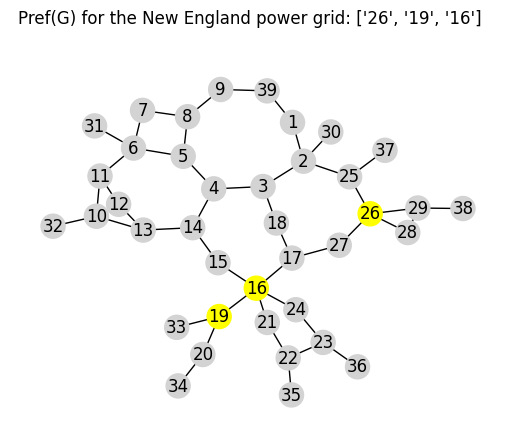

In [33]:
if __name__ == '__main__':
    ExampleGraph = NewEnglandGraph()

    EndSet = Pref(ExampleGraph)

    print(f'Preferred vertices on the New England power grid are: {EndSet}')
    
    ColorMap = [
        "yellow" if vertex in EndSet else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Pref(G) for the New England power grid: {EndSet}')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The following encapsulates the idea of active vertices on a graph with blue vertices.

In [34]:
def active_vertices(Input_graph:nx.classes.graph=nx.null_graph(), Blues:Sequence=set()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    Blues - a set
      This is the set of vertices in the graph that, for some reason or another, are already blue
    
    OUTPUT
    
    a set object containing vertices with degree at least 3 and who's closed neighborhood contains at least 1 non-blue vertex
    '''
        
    high_degree_vertices = (vertex for vertex, degree in Input_graph.degree() if degree > 2)
    return set(vertex for vertex in high_degree_vertices if any(neighbor not in Blues for neighbor in closed_neighborhood(Input_graph, (vertex,))))

Active vertices after power dominating from vertex 2 on the Zim graph are only 9, 10, and 11. Only vertex 9 is high degree since vertices 10 and 11 have degree 2.

{'9'} are vertices degree 3 or higher with unobserved neighbors when considering {'1', '3', '5', '6', '8', '2', '4', '9', '7'} to be observed on the Zim Graph


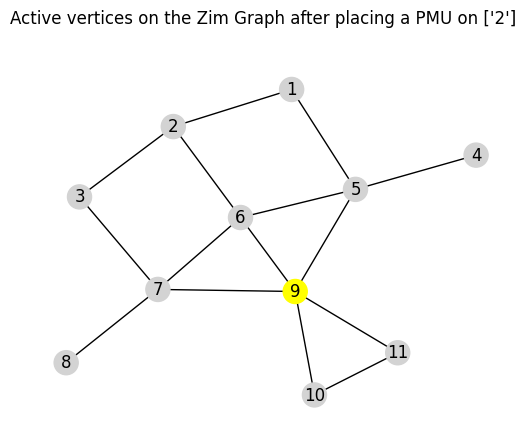

In [35]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    SeedSet = ['2']
    
    Blues = PowerDominate(ExampleGraph, SeedSet)
    
    Actives = active_vertices(ExampleGraph, Blues)
    
    ColorMap = [
        "yellow" if vertex in Actives else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]
    print(f'{Actives} are vertices degree 3 or higher with unobserved neighbors when considering {Blues} to be observed on the Zim Graph')

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Active vertices on the Zim Graph after placing a PMU on {SeedSet}')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

Now we implement the calculation of the qualitative score for each non-preferred, non-redundant, vertex with degree 3 or higher.

In [36]:
def determine_qual_scores(Input_graph:nx.classes.graph=nx.null_graph(), ValidVertices:Sequence=set(), Blues:Sequence=list(), PreferredVertices:Sequence=list(), Contracted:bool=False):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    ValidVertices - a set of vertices in Input_graph
      This is the set of vertices for which qualitative scores are calculated
    Blues - a list of vertices
      These vertices are already colored blue in the graph
    PreferredVertices - a list of vertices
      These vertices have at least 2 terminal paths, or power dominate at least one of their terminal forts
    Contracted - a boolean (defaults to False)
      This is a flag to indicate whether the graph has already been contracted with ContractGraph already or not. We leverage the fact that all terminal paths are contracted to leaves, and so we must ensure that the graph has been contracted.
    
    OUTPUT
    qual_scores - a dictionary
      Keys in this dictionary are vertices with white neighbors and degree 3 or higher. Values in this dictionary is the number of vertices observed by the set {vertex} union Pref.
    '''

    if not Contracted:
        Input_graph = ContractGraph(Input_graph)
        Contracted = True
    
    #If neither the list of preferred vertices nor the list of blue vertices are given, one must calculate the list of blue vertices by way of calculating the preferred vertices
    if not PreferredVertices and not Blues:
        PreferredVertices = Pref(Input_graph, Contracted)
        Blues = PowerDominate(Input_graph, PreferredVertices)

    #If only the list of preferred vertices is given, one can circumvent calculating the list of preferred vertices and simply calculate the blue vertices directly
    elif not Blues:
        Blues = PowerDominate(Input_graph, PreferredVertices)

    #If the set of valid vertices is not passed in, calculate all vertices with white neighbors and degree at least 3
    if not ValidVertices:
        ValidVertices = active_vertices(Input_graph, Blues)

    qual_scores = {vertex:len(power_dominate_partial(Input_graph, New_pmus=[vertex,], Blues=Blues)) for vertex in ValidVertices}

    return qual_scores

Now we print the Zim graph with labels being the calculated qualitative score

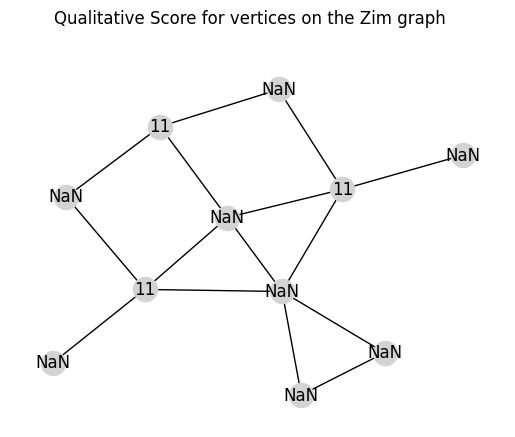

In [37]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    label_dict = determine_qual_scores(ExampleGraph)
    for vertex in ExampleGraph:
        if vertex not in label_dict:
            label_dict[vertex]='NaN'
            
    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Qualitative Score for vertices on the Zim graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color='lightgrey', labels=label_dict, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The following 5 functions comprise the search for incuded $C_4$ substructures that can be leveraged to reduce the search space for a minimum power domianting set.

This first function returns all induced 4 cycles in the input graph.

In [38]:
def induced_4_cycles(Input_graph:nx.classes.graph=nx.null_graph()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    
    OUTPUT
    
    induced_cycles
      This is a list of lists, where the inside lists are 4 vertices that create an induced 4 cycle within Input_graph
    '''

    induced_cycles = list(cycle for cycle in nx.chordless_cycles(Input_graph, length_bound=4) if len(cycle) == 4)
    return induced_cycles

View the induced 4 cycles in the Zim graph.

In [39]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    four_cycles = induced_4_cycles(ExampleGraph)
    print('The induced 4 cycles on the Zim graph are:')
    [print(cycle) for cycle in four_cycles]

The induced 4 cycles on the Zim graph are:
['2', '1', '5', '6']
['2', '3', '7', '6']


A fort is a special induced $C_4$ fort when there are 2 non-adjacent degree 2 vertices.

In [40]:
def induced_cycle_forts(Input_graph:nx.classes.graph=nx.null_graph(), Contracted:bool=False):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    Contracted - a boolean
      We can find all, non-terminal, induced cycle forts by way of finding induced 4-cycles on the contracted graph, this flag is logic to skip contracting the graph if it has already been contracted
    
    OUTPUT
    
    valid_forts - a list of list objects
      This is a list of lists, where the inside lists are 2 vertices in an induced cycle in Input_graph with degree 2
    '''

    if not Contracted:
        Input_graph = ContractGraph(Input_graph)

    #The forts that we are looking for, are 2 vertices of degree 2 that have identical neighborhoods. We start with degree 2 vertices
    degree_2_vertices = set(vertex for vertex, degree in Input_graph.degree() if degree==2)
    
    #We then look for induced 4 cycles that include these degree 2 vertices
    closed_neighborhood_degree_2_vertices = closed_neighborhood(Input_graph, degree_2_vertices)
    subgraph = Input_graph.subgraph(closed_neighborhood_degree_2_vertices)
    induced_cycles = induced_4_cycles(subgraph)

    #We then want to return only the vertices of degree 2 in these cycles
    vertex_forts = [[vertex for vertex in induced_cycle if Input_graph.degree(vertex) == 2] for induced_cycle in induced_cycles]
    valid_forts = [set(fort) for fort in vertex_forts if len(fort)==2]
    
    return valid_forts

View the induced 4-cycle forts in the New England power grid when the node 32 is removed, leaving a single induced $C_4$ fort.

{'12', '10'}


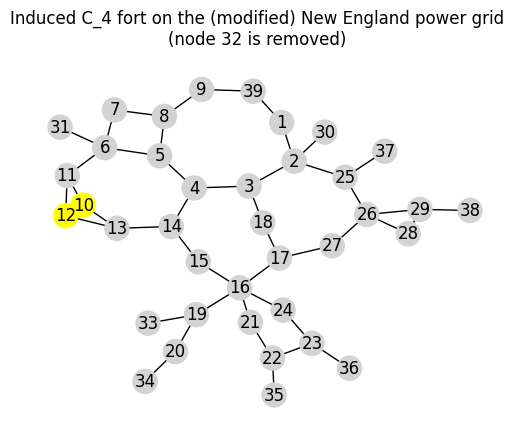

In [41]:
if __name__ == '__main__':
    ExampleGraph = NewEnglandGraph()
    ExampleGraph.remove_node('32')

    four_cycles = induced_cycle_forts(ExampleGraph)
    [print(cycle) for cycle in four_cycles]
    
    ColorMap = [
        "yellow" if vertex in set.union(*(cycle for cycle in four_cycles)) else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Induced C_4 fort on the (modified) New England power grid\n(node 32 is removed)')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

Taking into consideration that these types of forts can overlap, the following function collapses overlaping induced $C_4$ forts.

In [42]:
def reduce_cycle_forts(Input_graph:nx.classes.graph=nx.null_graph(), Contracted:bool=False, Blues:Sequence=set()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    Contracted - a boolean
      We can find all, non-terminal, induced cycle forts by way of finding induced 4-cycles on the contracted graph, this flag is logic to skip contracting the graph if it has already been contracted
    Blues - a set
      This is the set of vertices in the graph that, for some reason or another, are already blue
    
    OUTPUT
    
    maximal_forts - a list of list objects
      This is a list of lists, where all forts located by induced_cycle_forts are expanded into maximal, non-overlapping, forts
    '''

    cycle_forts = induced_cycle_forts(Input_graph, Contracted)

    #We want to collapse the overlapping forts into maximal forts, and therefore we turn to the graph theoretic solution of finding connected components
    solution_space = nx.Graph()
    for fort in cycle_forts:
        if not fort.issubset(Blues):
            solution_space.add_edge(fort.pop(), fort.pop())

    maximal_forts = list(connected_component for connected_component in nx.connected_components(solution_space))

    return maximal_forts

By slightly modifying the New England power grid, we can force there to be overlapping induced $C_4$ forts. View the following.

{'40', '12', '10'}


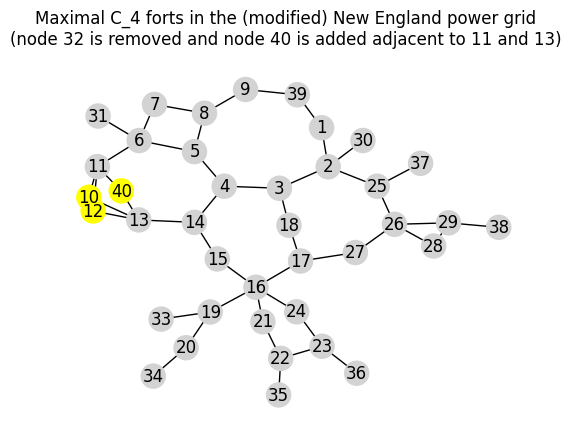

In [43]:
if __name__ == '__main__':
    ExampleGraph = NewEnglandGraph()
    ExampleGraph.remove_node('32')
    ExampleGraph.add_edge('40','11')
    ExampleGraph.add_edge('40','13')

    four_cycles = reduce_cycle_forts(ExampleGraph)
    [print(cycle) for cycle in four_cycles]
    
    ColorMap = [
        "yellow" if vertex in set.union(*(cycle for cycle in four_cycles)) else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Maximal C_4 forts in the (modified) New England power grid\n(node 32 is removed and node 40 is added adjacent to 11 and 13)')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The entrance of a set of vertices is defined to be the set of vertices adjacent to vertices in the given set, but not in the given set itself. The following function implements this.

In [44]:
def entrance(Input_graph:nx.classes.graph=nx.null_graph(), Vertices:Sequence=set()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    Vertices - an iterable of vertices in Input_graph
      This is the vertex set under inspection
    
    OUTPUT
    
    a set - this is the set of vertices not in Vertices, that are adjacent to at least 1 vertex in Vertices
    '''

    return closed_neighborhood(Input_graph, Vertices).difference(set(Vertices))

View the entrance vertices for the induced $C_4$ forts found in the modified New England power grid.

{'13', '11'}


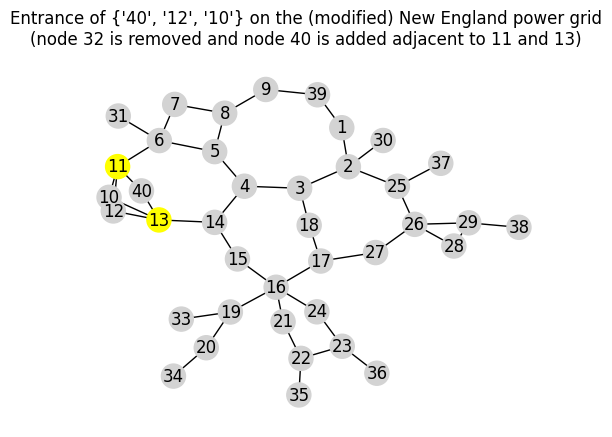

In [45]:
if __name__ == '__main__':
    ExampleGraph = NewEnglandGraph()
    ExampleGraph.remove_node('32')
    ExampleGraph.add_edge('40','11')
    ExampleGraph.add_edge('40','13')

    four_cycles = reduce_cycle_forts(ExampleGraph)
    entrances = [entrance(ExampleGraph, cycle) for cycle in four_cycles]
    [print(entrance) for entrance in entrances]
    
    ColorMap = [
        "yellow" if vertex in set.union(*(entrance for entrance in entrances)) else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]
    
    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Entrance of {four_cycles[0]} on the (modified) New England power grid\n(node 32 is removed and node 40 is added adjacent to 11 and 13)')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The following function returns a lower bound for a minimum set that intersects non-trivially with the input collection. This problem is NP-complete and can be reduced to the domination problem.

In [46]:
def approximate_order_phi(Collection:Sequence=list()):
    '''
    INPUT

    Collection - a list
        This is the set of paired entrance vertices

    The absolute solution to this problem can be solved by solving the domination problem on the solution_space graph. So as to not embed a NP complete problem inside of the power domination problem, we assume the lower bound being simply the number of connected components of the solution_space grpah.

    OUTPUT

        An approximation on the minimum number of elements needed to intersect non-trivially with each set in Collection
    '''

    solution_space = nx.Graph()
    for element in Collection:
        solution_space.add_edges_from(pair for pair in it.combinations(element,2))
    return nx.number_connected_components(solution_space)

Observe that one must select at least 3 items from the following colleciotn to intersect non-trivially with each element in the following collection.

In [47]:
if __name__ == '__main__':
    collection = [
        [1,2],
        [2,3],
        [4,5],
        [6,7]
    ]
    print(f'One must choose at least {approximate_order_phi(collection)} items to intersect non-trivially with each element in {collection}')

One must choose at least 3 items to intersect non-trivially with each element in [[1, 2], [2, 3], [4, 5], [6, 7]]


The following function ensures that the given subset intersects non-trivially with the required set. This, in combination with the previous function, ensure that the PDT only inspects potential PDSs that intersect non-trivially with each set in Φ

In [48]:
def intersects_non_trivially_with_all(Subset:Sequence=set(), Required:Sequence=set()):
    '''
    INPUT
    
    Subset - an iterable object
      This is the subset under inspection
    Required - an iterable object
      This is an interable object who's elements must intersect non-trivially with Subset
    
    OUTPUT
    
    true or false depending on if the given subset intersects non-trivially with each element of Required
    '''

    return all(set(Subset).intersection(entrance) for entrance in Required)

Observe the following output.

In [49]:
if __name__ == '__main__':
    SeedSet = [1, 2, 3, 4]
    Subsets = [[1, 5], [1, 2], [0, 3]]
    print(f'The set {SeedSet} intersects with each of {Subsets}: {intersects_non_trivially_with_all(SeedSet, Subsets)}')
    
    SeedSet = [1, 2, 3, 4]
    Subsets = [[1, 5], [1, 2], [0, 5]]
    print(f'The set {SeedSet} intersects with each of {Subsets}: {intersects_non_trivially_with_all(SeedSet, Subsets)}')

The set [1, 2, 3, 4] intersects with each of [[1, 5], [1, 2], [0, 3]]: True
The set [1, 2, 3, 4] intersects with each of [[1, 5], [1, 2], [0, 5]]: False


We now have the framework to generate the potential power domianting sets. We include a PMU at each vertex in Pref, and we enforce that each set intersects nontrivially with each set in Pev(G')

In [50]:
def _potential_pds_iterator(RequiredVertices:Sequence=list(), CycleEntrances:Sequence=set(), ActiveVertices:Sequence=set(), nAdditionalVertices:int=0):
    '''
    INPUT
    
    RequiredVertices - a list of vertex labels
      This is the list of vertices to be appended to a potential power dominating set
    Cycle_entrances - a list of vertex labels
      This is the list of pairs of entrance vertices to 4-cycle jeffs
    ActiveVertices - a list of vertex labels
      This is the vertices contained in Graph sorted by the likelihood function
    nAdditionalVertices - an integer
      This is used as the number of vertices to add to preferred vertices
    
    OUTPUT
    
    One by one a set of vertices are returned
    '''

    # If there is a cycle entrance that shares no elements with ActiveVertices, then there is no way for the requirement to be satisfied...
    if all(set(entrance).intersection(set(ActiveVertices)) for entrance in CycleEntrances):
        for subset in it.combinations(ActiveVertices,nAdditionalVertices):
            if intersects_non_trivially_with_all(subset, CycleEntrances):
                yield list(RequiredVertices)+list(subset)
            else:
                continue
    if nAdditionalVertices == len(ActiveVertices):
      yield list(RequiredVertices)+list(ActiveVertices)

This function is not given an example

We now begin the framework for the implementation of parallel computing in the PDT. The next function takes an input iterator, and returns chunks of it of the given size.

In [51]:
def _chunkerator(Iterator:Sequence=set(), Chunk_size:int=0):
    '''
    INPUT
    
    Iterator - an iterable object
      This is the base iterator, where groups of its contents will be yielded
    Chunk_size - an integer
      Iterators containing this number of objects from the iterable will be yielded
    
    OUTPUT
    
    - an iterator of objects from Iterator
      This is an iterator that contains *at most* Chunk_size items
    '''
    
    loop_iterator, Iterator = it.tee(Iterator, 2)

    # for each item in the iterator we assign it a number
    for number, item in enumerate(loop_iterator):

        # If we've passed by Chunk_size number of items, then we return an iterator containing the next chunk of items
        if number%Chunk_size == 0:
            yield it.islice(Iterator, 0, Chunk_size)

For example, observe how the first 10 numbers, chunked in groups of 3, is $\{1, 2, 3\}, \{4, 5, 6\}, \{7, 8, 9\}, \{10\}$

In [52]:
if __name__ == '__main__':
    numbers = [number for number in range(1, 11, 1)]
    chunks = _chunkerator(numbers, 3)
    [print(*chunk) for chunk in chunks]

1 2 3
4 5 6
7 8 9
10


The following function is now able to implement a parallel search for a power dominating set.

In [53]:
def _parallel_check(Function:Callable, Arguments:Sequence=set(), Chunk_size=500000, Number_workers:int=0):
    '''
    INPUT
    
    Function - an callable object
      This is the function that will be called with each argument in Arguments. Function needs to return a tuple of a boolean and another object in that order
    Arguments - an iterable object of tuples
      This is an interable object where each object is positional arguments to Function
    Chunk_size - an integer
      Groups of this size will be considered as jobs to submit to the worker pool
    Number_workers - an integer
      This is the number of workers in the worker pool
    
    OUTPUT
    
    truth_value, output - a tuple of a boolean and an object returned by Function
      when _parallel_check encounters a set of arguments that returns True, a tuple is returned that contains True and the function's other output, otherwise the opposite is returned
    '''

    # If the number of workers was not passed in, then we determine it to be all possible, less one
    Number_workers = max(1,multiprocessing.cpu_count()-1)  if not Number_workers else Number_workers

    # Semantically, if there is never any work we must still be able to have truth_value and output, so we initialize them to None off the bat and overwrite them as needed.
    truth_value, output = None, None

    # Parallelization is done with a multiprocessing pool
    with multiprocessing.Pool(processes=Number_workers) as pool:

        for work_chunk in _chunkerator(Arguments, Chunk_size):

            # For each function call with a set of arguments, if the Function returns True, then we can short circuit and return
            for truth_value, output in pool.starmap(Function, work_chunk):
                if truth_value:
                    return truth_value, output

    # If the entire work is exhausted without finding Searching_for, then we can return the last pair of input and output
    return truth_value, output

This function is not given an example

We now implement the parallel check, but with the first 50000 potential power dominating sets being checked on a single thread before branching.

In [54]:
def CheckForPDSWithAdditional(Input_graph:nx.classes.graph=nx.null_graph(), Contracted:bool=False, PreferredVertices:Sequence=list(), CycleEntrances:Sequence=set(), ActiveVertices:Sequence=set(), Blues:Sequence=set(), nAdditionalVertices:int=0, Number_workers:int=0):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    Contracted - a boolean
      We can find all, non-terminal, induced cycle forts by way of finding induced 4-cycles on the contracted graph, this flag is logic to skip contracting the graph if it has already been contracted
    PreferredVertices - a list of vertex labels
      This is the list of vertices to be appended to a potential power dominating set
    CycleEntrances - a list of vertex labels
      This is the list of pairs of entrance vertices to 4-cycle jeffs
    ActiveVertices - a list of vertex labels
      This is the vertices contained in Graph sorted by the likelihood function
    Blues - a set
      This is the set of vertices in the graph that, for some reason or another, are already blue
    nAdditionalVertices - an integer
      This is used as the number of vertices to add to preferred vertices
    Number_workers - an integer
      This is the number of workers in the worker pool
    
    OUTPUT
    
    If there exists a minimum power dominating set subject to Pref(G) with the given number of additional (non-preferred) vertices, then it is returned, otherwise None is returned
    '''
    
    # If the number of workers was not passed in, then we determine it to be all possible, less one
    Number_workers = max(1,multiprocessing.cpu_count()-1)  if not Number_workers else Number_workers

    # If the graph has not yet been contracted, then we contract it.
    if not Contracted:
        Input_graph = ContractGraph(Input_graph)
        Contracted = True
    
    # If Pref(G') has not yet been calculated, then we calculate it.
    if not PreferredVertices:
        PreferredVertices = Pref(Input_graph, Contracted)

    # If the entrance of C_4 forts has not been calculated, then we calculate it.
    if not CycleEntrances:
        CycleEntrances = [entrance(Input_graph, fort) for fort in reduce_cycle_forts(Input_graph, Contracted)]

    # Blues have not been calculated, then we determine Obs(G';Pref(G'))
    if not Blues:
        Blues = PowerDominate(Input_graph, PreferredVertices)

    # If active vertices have not been calculated, then we calculate it via the qualitative score dictionary
    if not ActiveVertices:
        valid_vertices = active_vertices(Input_graph, Blues)
        qual_score_dictionary = determine_qual_scores(Input_graph, valid_vertices, Blues, PreferredVertices, Contracted)
        ActiveVertices = sorted(valid_vertices, key=lambda x:qual_score_dictionary[x], reverse=True)

    work_iterator = _potential_pds_iterator(PreferredVertices,CycleEntrances,ActiveVertices,nAdditionalVertices)

    #We check, on a single thread, the first 50,000 potentially power dominating sets
    for placement, dummy_counter in zip(work_iterator, range(50000)):
        try:
            if is_PDS_partial(Input_graph, placement, Blues):
                # print('returning single-threaded, pds found')
                return placement
        except StopIteration:
            # print('returning single-threaded, none found')
            return None

    #Now we set up to perform a parallel search
    map_function = functools.partial(is_PDS_partial, Return_placement=True)
    arguments = zip(it.repeat(Input_graph), work_iterator, it.repeat(Blues))
    truth_value, placement = _parallel_check(map_function, arguments, 500000, Number_workers)
    if truth_value:
        # print('returning multi-threaded')
        return placement
    else:
        return None

Notice the following power dominating set that includes 3, additional, non-preferred, non-redundant, and non-low-degree vertices.

['9', '5', '2', '7'] is a minimum power dominating set of the Zim graph subject to Pref(G) and no PMU on a non-active, nor redundant vertex


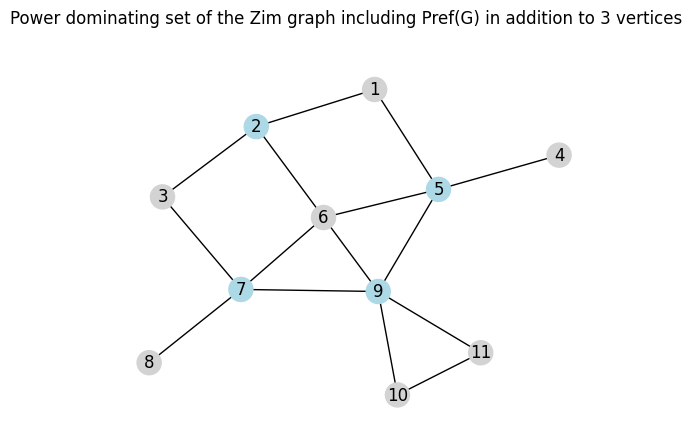

In [55]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()
        
    pds = CheckForPDSWithAdditional(ExampleGraph, nAdditionalVertices=3)

    print(f'{pds} is a minimum power dominating set of the Zim graph subject to Pref(G) and no PMU on a non-active, nor redundant vertex')
    
    ColorMap = [
        "lightblue" if vertex in pds else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]
    
    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Power dominating set of the Zim graph including Pref(G) in addition to 3 vertices')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

We now implement a function that allows the user to check for a minimum power dominating set of $G'$ subject to Pref($G'$) of a fixed size, in a parallel manner. 

In [56]:
def CheckForPDSOfSize(Input_graph:nx.classes.graph=nx.null_graph(), Contracted:bool=False, PreferredVertices:Sequence=list(), CycleEntrances:Sequence=set(), ActiveVertices:Sequence=set(), Blues:Sequence=set(), Placement_size:int=0, Number_workers:int=0):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    Contracted - a boolean
      We can find all, non-terminal, induced cycle forts by way of finding induced 4-cycles on the contracted graph, this flag is logic to skip contracting the graph if it has already been contracted
    PreferredVertices - a list of vertex labels
      This is the list of vertices to be appended to a potential power dominating set
    CycleEntrances - a list of vertex labels
      This is the list of pairs of entrance vertices to 4-cycle jeffs
    ActiveVertices - a list of vertex labels
      This is the vertices contained in Graph sorted by the likelihood function
    Blues - a set
      This is the set of vertices in the graph that, for some reason or another, are already blue
    Placement_size - an integer
      This is used as the number of vertices allowed in a power dominating set
    Number_workers - an integer
      This is the number of workers in the worker pool
    
    OUTPUT
    
    If there exists a minimum power dominating set subject to Pref(G) with the given number of additional (non-preferred) vertices, then it is returned, otherwise None is returned
    '''

    # If the number of workers was not passed in, then we determine it to be all possible, less one
    Number_workers = max(1,multiprocessing.cpu_count()-1)  if not Number_workers else Number_workers

    # If the graph has not yet been contracted, then we contract it.
    if not Contracted:
        Input_graph = ContractGraph(Input_graph)
        Contracted = True
    
    # If Pref(G') has not yet been calculated, then we calculate it.
    if not PreferredVertices:
        PreferredVertices = Pref(Input_graph, Contracted)

    # If the entrance of C_4 forts has not been calculated, then we calculate it.
    if not CycleEntrances:
        CycleEntrances = [entrance(Input_graph, fort) for fort in reduce_cycle_forts(Input_graph, Contracted)]

    # Blues have not been calculated, then we determine Obs(G';Pref(G'))
    if not Blues:
        Blues = PowerDominate(Input_graph, PreferredVertices)

    # If active vertices have not been calculated, then we calculate it via the qualitative score dictionary
    if not ActiveVertices:
        valid_vertices = active_vertices(Input_graph, Blues)
        qual_score_dictionary = determine_qual_scores(Input_graph, valid_vertices, Blues, PreferredVertices, Contracted)
        ActiveVertices = sorted(valid_vertices, key=lambda x:qual_score_dictionary[x], reverse=True)

    # We calculate the number of additional vertices as the total size allowed minus the number of preferred vertices
    nAdditionalVertices = max(0, Placement_size-len(PreferredVertices))

    # if more additional vertices are required than there are active vertices, then there isn't a power dominating set with these restrictions.
    if nAdditionalVertices > len(ActiveVertices):
        print('There are not enough non-preferred, non-redundant vertices to form a power dominating set of this size')
        return None
    
    return CheckForPDSWithAdditional(Input_graph, Contracted, PreferredVertices, CycleEntrances, ActiveVertices, Blues, nAdditionalVertices, Number_workers)

Observe a minimum power dominating set of size 3 of the Zim Graph.

['9', '5', '2'] is a power dominating set of the Zim graph subject to Pref(G) and no PMUs on non-active, nor redundant vertices


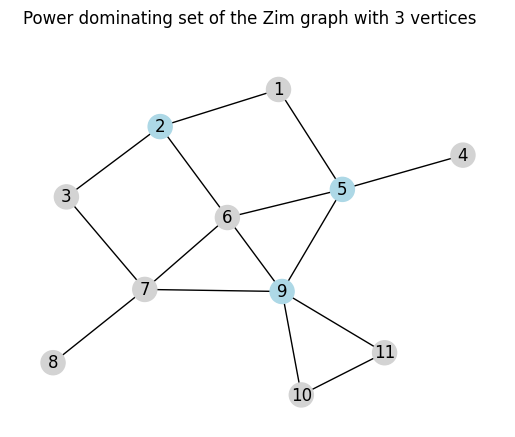

In [57]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()
        
    pds = CheckForPDSOfSize(ExampleGraph, Placement_size=3)

    print(f'{pds} is a power dominating set of the Zim graph subject to Pref(G) and no PMUs on non-active, nor redundant vertices')
    
    ColorMap = [
        "lightblue" if vertex in pds else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]
    
    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Power dominating set of the Zim graph with 3 vertices')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

We now implement logic to determine the minimum power dominating set of a given input graph.

In [58]:
def PDT_minpds_connected(Input_graph:nx.classes.graph=nx.null_graph(), Contracted:bool=False, PreferredVertices:Sequence=list(), CycleEntrances:Sequence=set(), ActiveVertices:Sequence=set(), Blues:Sequence=set(), Number_workers:int=0):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    Contracted - a boolean
      We can find all, non-terminal, induced cycle forts by way of finding induced 4-cycles on the contracted graph, this flag is logic to skip contracting the graph if it has already been contracted
    PreferredVertices - a list of vertex labels
      This is the list of vertices to be appended to a potential power dominating set
    CycleEntrances - a list of vertex labels
      This is the list of pairs of entrance vertices to 4-cycle jeffs
    ActiveVertices - a list of vertex labels
      This is the vertices contained in Graph sorted by the likelihood function
    Blues - a set
      This is the set of vertices in the graph that, for some reason or another, are already blue
    Size - an integer
      This is used as the number of vertices allowed in a power dominating set
    Number_workers - an integer
      This is the number of workers in the worker pool
    '''

    # If the number of workers was not passed in, then we determine it to be all possible, less one
    Number_workers = max(1,multiprocessing.cpu_count()-1) if not Number_workers else Number_workers

    # If the graph has not yet been contracted, then we contract it.
    if not Contracted:
        Input_graph = ContractGraph(Input_graph)
        Contracted = True

    # As an edge case, if there are no vertices degree 3 or higher, then any vertex is a power dominating set
    if not any(vertex for vertex,degree in Input_graph.degree() if degree > 3):
        return [next(x for x in Input_graph.nodes),]
    
    # If Pref(G') has not yet been calculated, then we calculate it.
    if not PreferredVertices:
        PreferredVertices = Pref(Input_graph, Contracted)

    # If blues have not been calculated, then we determine Obs(G';Pref(G'))
    if not Blues:
        Blues = PowerDominate(Input_graph, PreferredVertices)
    if len(Blues) == Input_graph.number_of_nodes():
        return PreferredVertices

    # If active vertices have not been calculated, then we calculate it via the qualitative score dictionary
    if not ActiveVertices:
        valid_vertices = active_vertices(Input_graph, Blues)
        qual_score_dictionary = determine_qual_scores(Input_graph, valid_vertices, Blues, PreferredVertices, Contracted)
        ActiveVertices = sorted(valid_vertices, key=lambda x:qual_score_dictionary[x], reverse=True)

    #If the vertex with highest qualitative forms a power dominating set in conjunction with pref, then we can return
    if qual_score_dictionary[ActiveVertices[0]] == Input_graph.number_of_nodes():
        return [*PreferredVertices, ActiveVertices[0]]

    # If the entrance of C_4 forts has not been calculated, then we calculate it.
    if not CycleEntrances:
        CycleEntrances = [entrance(Input_graph, fort) for fort in reduce_cycle_forts(Input_graph, Contracted)]

    # Then we determine how many additional vertices we need
    nAdditionalVertices = max(2, approximate_order_phi(CycleEntrances))

    # While we have not found a minimum power dominating set of this component, we increase the number of additional vertices
    PDS = list()
    while not PDS:
        PDS = CheckForPDSWithAdditional(Input_graph, Contracted, PreferredVertices, CycleEntrances, ActiveVertices, Blues, nAdditionalVertices, Number_workers)
        if not PDS:
          nAdditionalVertices += 1
    return PDS

Notice that the PDT determines a minimum power dominating set containing '9' for the Zim graph

['9', '5'] is a minimum power dominating set of the Zim graph


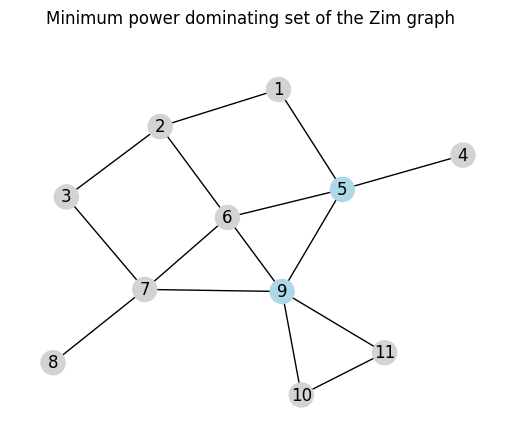

In [59]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()
        
    pds = PDT_minpds_connected(ExampleGraph)

    print(f'{pds} is a minimum power dominating set of the Zim graph')
    
    ColorMap = [
        "lightblue" if vertex in pds else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]
    
    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Minimum power dominating set of the Zim graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

We now provide a function that intakes any graph, not just connected, and returns a minimum power dominating set

In [60]:
def PDT_minpds(Input_graph:nx.classes.graph=nx.null_graph(), Contracted:bool=False, PreferredVertices:Sequence=list(), CycleEntrances:Sequence=set(), ActiveVertices:Sequence=set(), Blues:Sequence=set(), Size:int=0, Number_workers:int=0):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph under inspection
    Contracted - a boolean
      We can find all, non-terminal, induced cycle forts by way of finding induced 4-cycles on the contracted graph, this flag is logic to skip contracting the graph if it has already been contracted
    PreferredVertices - a list of vertex labels
      This is the list of vertices to be appended to a potential power dominating set
    CycleEntrances - a list of vertex labels
      This is the list of pairs of entrance vertices to 4-cycle jeffs
    ActiveVertices - a list of vertex labels
      This is the vertices contained in Graph sorted by the likelihood function
    Blues - a set
      This is the set of vertices in the graph that, for some reason or another, are already blue
    Size - an integer
      This is used as the number of vertices allowed in a power dominating set
    Number_workers - an integer
      This is the number of workers in the worker pool
    '''

    # If the number of workers was not passed in, then we determine it to be all possible, less one
    Number_workers = max(1,multiprocessing.cpu_count()-1) if not Number_workers else Number_workers

    # If the graph has not yet been contracted, then we contract it.
    if not Contracted:
        Input_graph = ContractGraph(Input_graph)
        Contracted = True
    
    # If Pref(G') has not yet been calculated, then we calculate it.
    if not PreferredVertices:
        PreferredVertices = Pref(Input_graph, Contracted)

    # Blues have not been calculated, then we determine Obs(G';Pref(G'))
    if not Blues:
        Blues = PowerDominate(Input_graph, PreferredVertices)
    if len(Blues) == Input_graph.number_of_nodes():
        return PreferredVertices

    # If the entrance of C_4 forts has not been calculated, then we calculate it.
    if not CycleEntrances:
        CycleEntrances = [entrance(Input_graph, fort) for fort in reduce_cycle_forts(Input_graph, Contracted)]
    
    PDS = list()

    for component_vertices in nx.connected_components(Input_graph):
      # We initialize all of the parameters that correspond to just this component
      connected_component = nx.subgraph(Input_graph, component_vertices)
      component_pref = list(set(component_vertices).intersection(set(PreferredVertices)))
      component_blues = list(set(Blues).intersection(component_vertices))
      component_pev = list(cycle_entrance for cycle_entrance in CycleEntrances if cycle_entrance.intersection(component_vertices))
      component_valids = active_vertices(connected_component, component_blues)
      component_qual_score_dictionary = determine_qual_scores(connected_component, component_valids, component_blues, component_pref, Contracted)
      component_actives = sorted(component_valids, key=lambda x:component_qual_score_dictionary[x], reverse=True)

      # We then check if pref plus the highest qualitative score forms a power dominating set for this component, if there are any active vertices in this component
      if component_actives and component_qual_score_dictionary[component_actives[0]] == connected_component.number_of_nodes():
        component_pds = [*component_pref, component_actives[0]]
        [PDS.append(vertex) for vertex in component_pds]
        continue

      # Then we determine how many additional vertices we need
      nAdditionalVertices = max(2, approximate_order_phi(component_pev))

      # While we have not found a minimum power dominating set of this component, we increase the number of additional vertices
      component_pds = list()
      while not component_pds:
        component_pds = PDT_minpds_connected(connected_component, Contracted, component_pref, component_pev, component_actives, component_blues,Number_workers)
        if component_pds:
          # If a minimum pds has been located for this component, we append it to the pds of the graph as a whole and go to the next connected component
          [PDS.append(vertex) for vertex in component_pds]
        else:
          nAdditionalVertices += 1
          
    # Once we've iterated over each connected component, then we return the PDS that we have found
    return PDS

Now observe the power dominating set for two disjoint Zim graphs

['G9', 'G5', 'H9', 'H5'] is a minimum power dominating set two disjoint Zim graphs


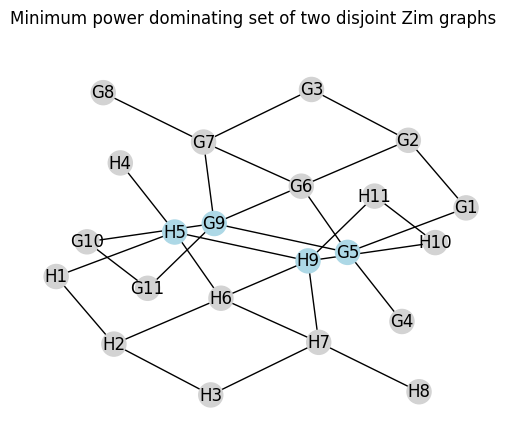

In [61]:
if __name__ == '__main__':
    ExampleGraph = nx.union_all(graphs=[ZimGraph(), ZimGraph()], rename=('G','H'))
        
    pds = PDT_minpds(ExampleGraph)

    print(f'{pds} is a minimum power dominating set two disjoint Zim graphs')
    
    ColorMap = [
        "lightblue" if vertex in pds else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]
    
    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Minimum power dominating set of two disjoint Zim graphs')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

Also observe the minimum power dominating set of a Zim Graph with an additional, isolated, vertex

['G9', 'G5', 'H0'] is a minimum power dominating set of a Zim graph with an isolated vertex


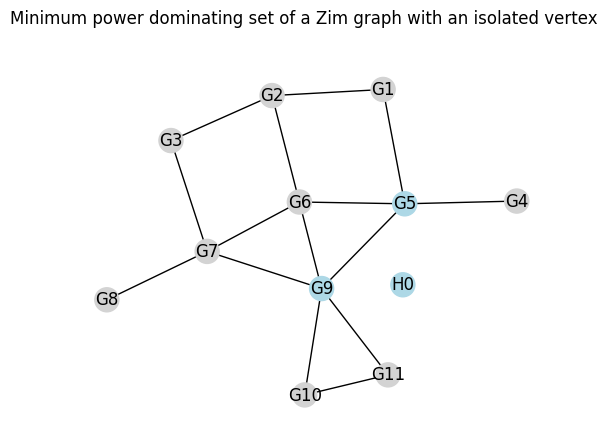

In [62]:
if __name__ == '__main__':
    ExampleGraph = nx.union_all(graphs=[ZimGraph(), nx.complete_graph(1)], rename=('G','H'))
        
    pds = PDT_minpds(ExampleGraph)

    print(f'{pds} is a minimum power dominating set of a Zim graph with an isolated vertex')
    
    ColorMap = [
        "lightblue" if vertex in pds else
        "lightgrey"
        for vertex in ExampleGraph.nodes()
    ]
    
    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Minimum power dominating set of a Zim graph with an isolated vertex')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

If the specific minimum power dominating set is not required and only the power domination number of the given graph is needed, the next function returns that number.

In [63]:
def PDT_pdn(Input_graph:nx.classes.graph=nx.null_graph(), Number_workers:int=0):
    '''
    INPUT
    
    Graph - a networkx graph object
      This is used as the graph under inspection
    Number_workers - an integer 
      This is going to be the number of processes to split into
    
    OUTPUT
    
    PDN - an integer
      This is the count of all the vertices in the given power dominating set for each of the connected components
    '''

    # If the number of workers was not passed in, then we determine it to be all possible, less one
    Number_workers = max(1,multiprocessing.cpu_count()-1)  if not Number_workers else Number_workers

    #Semantically, the power dominating number is the length of a minimum power dominating set, so we have to find a minimum power dominating set
    PDN = len(PDT_minpds(Input_graph, Number_workers))

    #Now we can return this number
    return PDN

Notice that the power domination number of the Zim graph is 2, as previously observed.

In [64]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()
        
    pdn = PDT_pdn(ExampleGraph)

    print(f'The power domination number of the Zim graph is {pdn}')

The power domination number of the Zim graph is 2


We now implement an iterator that returns all power dominating sets of a given size one at a time, with the use of an iterator

In [65]:
def allpds_of_size(Input_graph:nx.classes.graph=nx.null_graph(), Placement_size:int=0):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    Placement_size- an integer 
      This is the subset size that will be used to find power dominating sets
    
    OUTPUT
    subset - a set object containing networkx vertex objects
    - one by one each pds of the given size
    '''

    argument1 = it.repeat(Input_graph)
    argument2 = it.combinations(Input_graph.nodes(), Placement_size)

    # The intent is to return the placement in all cases, so we use a partial function with that argument defaulted
    map_function = functools.partial(isPDS, Return_placement=True)

    for truth_value, subset in map(map_function, argument1, argument2):
        if truth_value:
            yield subset

Observe that each subset of 10 vertices of the Zim graph form a power dominating set 

In [66]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()
    
    print(f'The following are all the power dominating sets of the Zim graph of size {ExampleGraph.number_of_nodes()-1}')
    
    [print(pds) for pds in allpds_of_size(ExampleGraph, ExampleGraph.number_of_nodes()-1)]

The following are all the power dominating sets of the Zim graph of size 10
('1', '2', '5', '3', '6', '7', '4', '9', '8', '10')
('1', '2', '5', '3', '6', '7', '4', '9', '8', '11')
('1', '2', '5', '3', '6', '7', '4', '9', '10', '11')
('1', '2', '5', '3', '6', '7', '4', '8', '10', '11')
('1', '2', '5', '3', '6', '7', '9', '8', '10', '11')
('1', '2', '5', '3', '6', '4', '9', '8', '10', '11')
('1', '2', '5', '3', '7', '4', '9', '8', '10', '11')
('1', '2', '5', '6', '7', '4', '9', '8', '10', '11')
('1', '2', '3', '6', '7', '4', '9', '8', '10', '11')
('1', '5', '3', '6', '7', '4', '9', '8', '10', '11')
('2', '5', '3', '6', '7', '4', '9', '8', '10', '11')


We then implement a specialized iterator that yields each minimum power dominating set

In [67]:
def allminpds(Input_graph:nx.classes.graph=nx.null_graph(), PDN:int=0, Number_workers:int=0):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    PDN- an integer
      This is the power domination number of the input graph, if none is given it is determined
    Number_workers - an integer
      This is the number of workers that can be allocated to determining all minimum power dominating sets, if none is given, it is determined

    OUTPUT

      one at a time - each minimum power dominating set
    '''

    Number_workers = min(1,multiprocessing.cpu_count()-1) if not Number_workers else Number_workers

    PDN = PDT_pdn(Input_graph, Number_workers) if not PDN else PDN

    yield from allpds_of_size(Input_graph, PDN)

Observe all 13 of the minimum power dominating sets of the Zim graph

In [68]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()
    
    print('The following are all the minimum power dominating sets of the Zim graph')
    
    [print(pds) for pds in allminpds(ExampleGraph)]

The following are all the minimum power dominating sets of the Zim graph
('1', '9')
('2', '9')
('2', '10')
('2', '11')
('5', '9')
('5', '10')
('5', '11')
('3', '9')
('7', '9')
('7', '10')
('7', '11')
('4', '9')
('9', '8')


If all power dominating sets of a given size are wanted all at once, we implement the following that does such in a parallel fashion. Note, this may have a long runtime for large graphs, as none of the optimizaiton like contracting, nor the restrictions the PDT uses is implemented.

In [69]:
def parallel_allpds_of_size(Input_graph:nx.classes.graph=nx.null_graph(), Placement_size:int=0, Number_workers:int=0):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    Placement_size - an integer 
      This is the subset size that will be used to find power dominating sets
    Number_workers - an integer
      This is the number of workers in the worker pool
    
    OUTPUT
    return_list - a list object containing all minimum power dominating sets of the input graph
    '''

    Number_workers = min(1,multiprocessing.cpu_count()-1) if not Number_workers else Number_workers

    argument1 = it.repeat(Input_graph)
    argument2 = it.combinations(Input_graph.nodes(), Placement_size)
    arguments = zip(argument1, argument2)

    # The intent is to return the placement in all cases, so we use a partial function with that argument defaulted
    map_function = functools.partial(isPDS, Return_placement=True)

    return_list = list()

    with multiprocessing.Pool(processes=Number_workers) as pool:
      [return_list.append(subset) for truth_value, subset in pool.starmap(map_function, iterable=arguments, chunksize=10000) if truth_value]
    
    return return_list

Observe all power dominating sets of size 3 for the Zim graph:

In [70]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()
    
    print('The following are all the power dominating sets of size 4 on the Zim graph')

    if hasattr(sys, 'ps1'):
        pdss = pdt.parallel_allpds_of_size(ExampleGraph, 4)
    else:
        pdss = parallel_allpds_of_size(ExampleGraph, 4)

    print(pdss)

The following are all the power dominating sets of size 4 on the Zim graph
[('1', '2', '5', '9'), ('1', '2', '5', '10'), ('1', '2', '5', '11'), ('1', '2', '3', '9'), ('1', '2', '3', '10'), ('1', '2', '3', '11'), ('1', '2', '6', '9'), ('1', '2', '6', '10'), ('1', '2', '6', '11'), ('1', '2', '7', '9'), ('1', '2', '7', '10'), ('1', '2', '7', '11'), ('1', '2', '4', '9'), ('1', '2', '4', '10'), ('1', '2', '4', '11'), ('1', '2', '9', '8'), ('1', '2', '9', '10'), ('1', '2', '9', '11'), ('1', '2', '8', '10'), ('1', '2', '8', '11'), ('1', '2', '10', '11'), ('1', '5', '3', '9'), ('1', '5', '3', '10'), ('1', '5', '3', '11'), ('1', '5', '6', '9'), ('1', '5', '6', '10'), ('1', '5', '6', '11'), ('1', '5', '7', '9'), ('1', '5', '7', '10'), ('1', '5', '7', '11'), ('1', '5', '4', '9'), ('1', '5', '4', '10'), ('1', '5', '4', '11'), ('1', '5', '9', '8'), ('1', '5', '9', '10'), ('1', '5', '9', '11'), ('1', '5', '8', '10'), ('1', '5', '8', '11'), ('1', '5', '10', '11'), ('1', '3', '6', '9'), ('1', '3', '6'

The following function implements the determination of if a set is a zero forcing set.

In [71]:
def isZFS(Input_graph:nx.classes.graph=nx.null_graph(), Vertices:Sequence=set()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to inspect
    Vertices - a set object containing networkx vertex objects
      This is used as the set to inspect
    
    OUTPUT
    
    truth_value - a boolean
      If the given set observes the entire graph via the zero forcing process, then the given set is a zero forcing set
    '''
    
    blues = ZeroForce(Input_graph, Vertices)
    
    if len(blues) == Input_graph.number_of_nodes():
        truth_value = True
    else:
        truth_value = False
        
    return truth_value

To demonstrate this function, we see that an endpoint of a path is a zero forcing set of the path.

[0] is a zero forcing set of the path on 6 vertices.
[1] is not a zero forcing set of the path on 6 vertices.


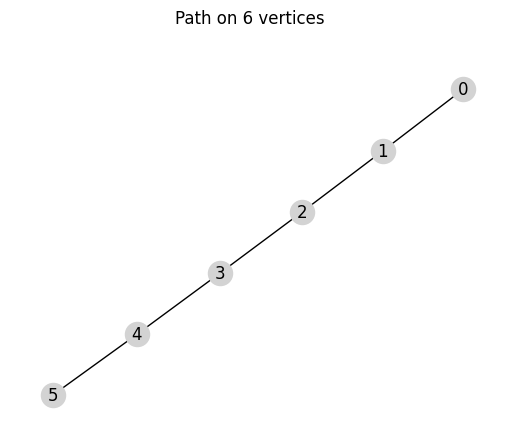

In [72]:
if __name__ == '__main__':
    ExampleGraph = nx.path_graph(6)

    potential_zero_forcing_set = [0]
    print(f"{potential_zero_forcing_set} is {'' if isZFS(ExampleGraph, potential_zero_forcing_set) else 'not '}a zero forcing set of the path on 6 vertices.")

    potential_zero_forcing_set = [1]
    print(f"{potential_zero_forcing_set} is {'' if isZFS(ExampleGraph, potential_zero_forcing_set) else 'not '}a zero forcing set of the path on 6 vertices.")

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Path on 6 vertices')
    nx.draw_kamada_kawai(ExampleGraph, node_color='lightgrey', with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

A zero forcing fort is a set of vertices for which there does not exist at least one vertex in the vertex set, not in the potential zero forcing fort, that is adjacent to exactly one vertex in the potential zero forcing fort. The following function implements that logical test.

In [73]:
def isZeroForcingFort(Input_graph:nx.classes.graph=nx.null_graph(), Vertices:Sequence=set()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to inspect
    Vertices - a set object containing networkx vertex objects
      This is used as the set to inspect
    
    OUTPUT
    
    truth_value - a boolean
      If there exists at least one vertex outside the given set that is connected to a unique vertex inside the given set, then the given set is not a zero forcing fort
    '''
    
    inside_vertices = set(Vertices)
    outside_vertices = set(Input_graph.nodes()).difference(inside_vertices)
    
    for outside_node in outside_vertices:
        if sum(1 for inside_node in inside_vertices if inside_node in Input_graph.neighbors(outside_node)) == 1:
            truth_value = False
            break
    else:
        truth_value = True
        
    return truth_value

To demonstrate this, we see that [10, 11] is a zero forcing fort of the zim graph, while [9, 10, 11] is not a zero forcing fort since vertex 5 is adjacent to only one vertex, vertex 9, in the set [9, 10, 11].

In [74]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    potential_fort = ['10', '11']
    print(f"{potential_fort} is {'' if isZeroForcingFort(ExampleGraph, potential_fort) else 'not '}a zero forcing fort of the Zim graph.")

    potential_fort = ['9', '10', '11']
    print(f"{potential_fort} is {'' if isZeroForcingFort(ExampleGraph, potential_fort) else 'not '}a zero forcing fort of the Zim graph.")

['10', '11'] is a zero forcing fort of the Zim graph.
['9', '10', '11'] is not a zero forcing fort of the Zim graph.


A failed power dominating set, is any set of vertices that does not observe the entire graph at the termination of the power domination process. The following functions handle determining if a set is a failed power dominating set of a given graph, determining a maximally-sized failed power dominating set of a given graph, and the failed power domination number (the size of a maximally-sized failed power dominating set) of a given graph.

In [75]:
def isFPDS(Input_graph:nx.classes.graph=nx.null_graph(), Pmu_placement:Sequence=set(), **kwargs):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to power dominate on
    Pmu_placement - a set object containing networkx vertex objects
      This is used as the initially colored vertices (before the domination step)
    
    Keyword arguments
    'Return_placement' - a boolean
      if this is set to true, then the initial set will be returned as well as the truth value of the set being a power dominating set
    
    OUTPUT
    
    depending on the keyword argument 'Return_placement', the truth value of being a power domianting set and the set is returned
    '''

    #First, color the initial set of vertices to start with
    Blues = list(Pmu_placement)
    
    #Second, color the neighbors of the initial set of vertices (domination step)
    DominatedBlues = Dominate(Input_graph, Blues)
        
    #Third, we play the zero forcing game
    Blues = ZeroForce(Input_graph, DominatedBlues)

    #Now if the entire graph is blue, then we found a power dominating set, otherwise we have found a failed power dominating set
    if len(Blues) == Input_graph.number_of_nodes():
        truth_value = False
    else:
        truth_value = True

    if kwargs.get('Return_placement', False) == True:
        return truth_value, Pmu_placement
    else:
        return truth_value

A single vertex in a clique of the barbell graph is a failed power dominating set, and two vertices from different cliques is not a failed power dominating set.

In [76]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    pmu_placement = ["0"]
    print(f"{pmu_placement} is {'' if isFPDS(ExampleGraph, pmu_placement) else 'not '}a failed power dominating set of the barbell graph.")

    pmu_placement = ["0","11"]
    print(f"{pmu_placement} is {'' if isFPDS(ExampleGraph, pmu_placement) else 'not '}a failed power dominating set of the barbell graph.")

['0'] is a failed power dominating set of the barbell graph.
['0', '11'] is not a failed power dominating set of the barbell graph.


In almost a reverse notion to power dominating sets, what is important to failed power dominating is not determining the smallest set that is a failed power dominating set. Determining a maximally-sized failed power dominating set is implemented in the following function.

In [77]:
def maxfpds(Input_graph:nx.classes.graph=nx.null_graph()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    
    OUTPUT
    
    subset - a list of vertex labels
      This is a maximum failed power dominating set
    '''

    # For each subset size
    for number_of_nodes in range(Input_graph.number_of_nodes()-1,0,-1):

        # For each subset
        for subset in it.combinations(Input_graph.nodes(), number_of_nodes):

            # If the subset is a power dominating set
            if isFPDS(Input_graph, subset):

                # We return the subset
                return subset

The largest failed power dominating set is the complement of a minimally-sized zero-forcing fort. As such, all vertices in the Zim graph except the closed neighborhood of one of the smallest zero-forcing fort (vertices 10 and 11 form the smallest zero-forcing fort) form a maximum failed power dominating set, as demonstrated below.

('1', '2', '5', '3', '6', '7', '4', '8') is a maximum failed power dominating set


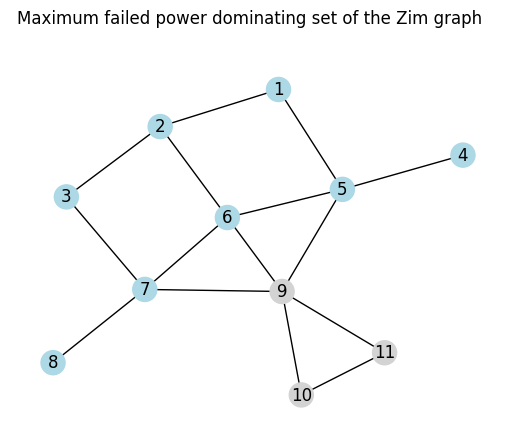

In [78]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    maximum_failed_power_dominating_set = maxfpds(ExampleGraph)
    print(maximum_failed_power_dominating_set, 'is a maximum failed power dominating set')

    ColorMap = [
        'lightblue' if vertex in maximum_failed_power_dominating_set else
        'lightgrey' for vertex in ExampleGraph
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Maximum failed power dominating set of the Zim graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

Similar to power domination, sometimes all that is desired is the cardinality of some maximum failed power dominating set. The next function determins this as the failed power domination number of an input graph.

In [79]:
def fpdn(Input_graph:nx.classes.graph=nx.null_graph()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    
    OUTPUT
    
    - an integer
      This is a maximum number of PMUs that can be used and fail to observe the entire graph
    '''

    return len(maxfpds(Input_graph))

As shown previously, we see that the failed power domiation number of the Zim graph is 8. This then means that any set of 9 vertices or more, on the zim graph, is a power dominating set.

In [80]:
if __name__ == '__main__':
    ExampleGraph = ZimGraph()

    failed_power_domination_number = fpdn(ExampleGraph)
    print(failed_power_domination_number, 'is the failed power domination number of the Zim graph.')

8 is the failed power domination number of the Zim graph.


A k-fault-tolerant power dominating set is any set of vertices where any subset where k vertices are removed from the initial set result in a power dominating set. The following function implements logic to test if a given pmu placement is a k-fault-tolerant power dominating set.

In [81]:
def isKFPDS(Input_graph:nx.classes.graph=nx.null_graph(), Pmu_placement:Sequence=set(), K:int=0, **kwargs):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    Pmu_placement- a set
      This is the set under investigation
    K - an integer
      This is the number of PMUs that are allowed to break
    
    Keyword arguments
    'Return_placement' - a boolean
      if this is set to true, then the initial set will be returned as well as the truth value of the set being a power dominating set
    
    OUTPUT
    
    depending on the keyword argument 'Return_placement', the truth value of being a k-fault-tolerant power domianting set and the set is returned
    '''

    # Determine the subset size of Pmu_placement to check
    size = len(Pmu_placement)-K

    # Create the iterator of arguments and send it to the helper function
    argument1 = it.repeat(Input_graph)
    argument2 = it.combinations(Pmu_placement, size)

    # The intent is to return the placement in all cases, so we use a partial function with that argument defaulted
    map_function = functools.partial(isFPDS, Return_placement=True)

    for truth_value, arguments in map(map_function, argument1, argument2):
       
        # If failed power dominating set is found, then the given placement is not k-fault-tolerant
        if truth_value:
            return_value = False
            break
    
    # If no failed power dominating set is found, then the given placement is k-fault-tolerant
    else:
        return_value = True

    if kwargs.get('Return_placement', False) == True:
        return return_value, Pmu_placement
    else:
        return return_value

Placing 2 pmus at different vertices in each clique of the barbell graph is a 1-fault-tolerant power dominating set, as shown below.

('0', '1', '8', '9') is a 1-fault-tolerant power dominating set of the barbell graph.


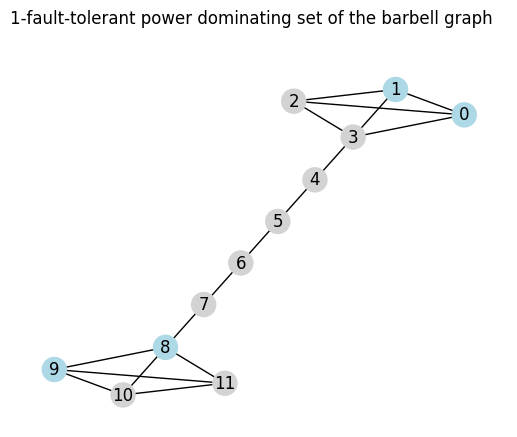

In [82]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    pmu_placement = ('0','1','8','9')
    print(f"{pmu_placement} is {'' if isKFPDS(ExampleGraph, pmu_placement, 1) else 'not '}a 1-fault-tolerant power dominating set of the barbell graph.")

    ColorMap = [
        'lightblue' if vertex in pmu_placement else
        'lightgrey' for vertex in ExampleGraph
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'1-fault-tolerant power dominating set of the barbell graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

Similar to power domination, minimum k-fault-tolerant power dominating sets are of interest to graph theorists. The following function implements a parallel search for a minimum k-fault-tolerant power dominating set of a given graph.

In [83]:
def min_kfpds(Input_graph:nx.classes.graph=nx.null_graph(), K:int=0, Number_workers:int=0, **kwargs):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    K - an integer
      This is the number of PMUs that are allowed to break
    Number_workers - an integer
      This is the number of workers in the worker pool
    
    Keyword arguments
    Start - an integer
      This will be the initial k-fault-tolerant power domination number that will be checked (inclusive)
    Stop - an integer
      This will be the upper bound (non inclusive) for k-fault-tolerant power domination numbers that will be checked
    
    OUTPUT
    
    placement - a list of vertex labels
      This is an example PMU placement of a minimum number of PMUs where k PMUs break is still a power dominating set while only allowing 1 PMU per vertex
    '''

    # If the number of workers was not passed in, then we determine it to be all possible, less one
    Number_workers = max(1,multiprocessing.cpu_count()-1)  if not Number_workers else Number_workers

    # If a start value was passed in, then we can initialize to that value, or we default to starting at pdn(G) + K
    kfpdn = kwargs.get('Start', PDT_pdn(Input_graph, 'MRZG_minpds') + K)

    # If a stop value was passed in, then we can initialize to that value, or we default to stopping at |G| which represents placing 1 PMU on every vertex
    max_value = kwargs.get('Stop', Input_graph.number_of_nodes())

    # Now we continuously loop until we break out of the loop by returning a value or hitting a stop condition
    while True:

        # Create the iterator of arguments and send it to the helper function
        argument1 = it.repeat(Input_graph)
        argument2 = it.combinations(Input_graph.nodes(), kfpdn)
        argument3 = it.repeat(K)
        arguments = zip(argument1, argument2, argument3)

        # The intent is to return the placement in all cases, so we use a partial function with that argument defaulted
        map_function = functools.partial(isKFPDS, Return_placement=True)

        truth_value, placement = _parallel_check(map_function, arguments, 500000, Number_workers)

        # If a k pmu defect robust power dominating set is located, then we can return it, otherwise we repeat the loop
        if truth_value:
            return placement
        else:
            kfpdn += 1

        # If we have exceeded the maximum theoretical k-pmu defect robust power domination number, we return None as a flag that something went wrong.
        if kfpdn > max_value:
            return None

We observe that the 1-fault-tolerant power dominating set from above is, in fact, a minimum 1-fault-tolerant power dominating set.

('0', '1', '8', '9') is a minimum 1-fault-tolerant power dominating set of the barbell graph.


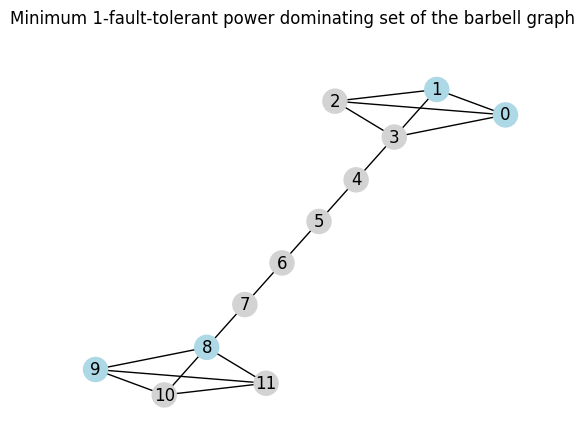

In [84]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    if hasattr(sys, 'ps1'):
        pmu_placement = pdt.min_kfpds(ExampleGraph, 1)
    else:
        pmu_placement = min_kfpds(ExampleGraph, 1)

    print(f"{pmu_placement} is a minimum 1-fault-tolerant power dominating set of the barbell graph.")

    ColorMap = [
        'lightblue' if vertex in pmu_placement else
        'lightgrey' for vertex in ExampleGraph
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Minimum 1-fault-tolerant power dominating set of the barbell graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

As with many graph parameters, just the size of a valid set is required, so we give a function that returns the required number of PMUs to construct a minimum k-fault-tolerant power dominating set.

In [85]:
def kfpdn(Input_graph:nx.classes.graph=nx.null_graph(), K:int=0):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    K - an integer
      This is the number of PMUs that are allowed to break
    
    OUTPUT
    
    - an integer
      This is a minimum number of PMUs that are needed to form a k-fault-tolerant power dominating set
    '''

    return len(min_kfpds(Input_graph, K))

We see that at minimum, 4 PMUs are necessary for a minimum 1-fault-tolerant power dominating set.

In [86]:
if __name__ == '__main__':
    ExampleGraph = BarbellGraph()

    if hasattr(sys, 'ps1'):
        min_pmus = pdt.kfpdn(ExampleGraph, 1)
    else:
        min_pmus = kfpdn(ExampleGraph, 1)

    print(f"At least {min_pmus} pmus are required for a 1-fault-tolerant power dominating set of the barbell graph.")

At least 4 pmus are required for a 1-fault-tolerant power dominating set of the barbell graph.


Different from k-fault-tolerant power dominating sets, k-PMU-defect-robust power dominating sets allow multiple PMUs on a single vertex. The logic for determining if a pmu placement is k-PMU-defect-robust is the same as determining if it is k-fault-tolerant, so we can reuse that module.

In [87]:
def isKRPDS(Input_graph:nx.classes.graph=nx.null_graph(), Pmu_placement:Sequence=list(), K:int=0, **kwargs):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    Pmu_placement- a list
      This is the multiset under investigation
    K - an integer
      This is the number of PMUs that are allowed to break
    
    OUTPUT
    
    - a boolean
      If each subset where K PMUs break of the Pmu_placement is a power dominating set this evaluates to true
    '''

    # The implementation of KFPDS() uses Pmu_placement as a list, and thereby inherently entrances the placement being a multiset. We simply use that implementation.
    return isKFPDS(Input_graph, Pmu_placement, K, **kwargs)

Classically, 2 PMUs located at the center of a star is a 1-PMU-defect-robust power dominaing set, as we can view from this example.

(0, 0) is a 1-PMU-defect-robust power dominating set of the star graph with 6 leaves.


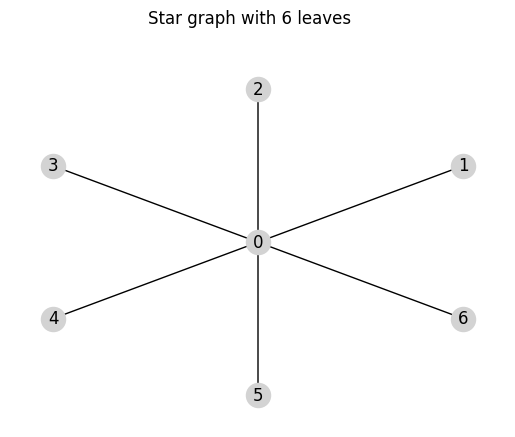

In [88]:
if __name__ == '__main__':
    ExampleGraph = nx.star_graph(6)

    pmu_placement = (0, 0)
    print(f"{pmu_placement} is {'' if isKRPDS(ExampleGraph, pmu_placement, 1) else 'not '}a 1-PMU-defect-robust power dominating set of the star graph with 6 leaves.")

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Star graph with 6 leaves')
    nx.draw_kamada_kawai(ExampleGraph, node_color='lightgrey', with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

With the semantic difference between k-fault-tolerant power dominating sets and k-PMU-defect-robust power dominating sets being multiplacements, the switch in logic comes in the form of combinations of vertices **WITH** replacement vs **WITHOUT** replacement. The following implements the difference.

In [89]:
def min_krpds(Input_graph:nx.classes.graph=nx.null_graph(), K:int=0, Number_workers:int=0, **kwargs):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    K - an integer
      This is the number of PMUs that are allowed to break
    Number_workers - an integer
      This is the number of workers in the worker pool
    
    Keyword arguments
    Start - an integer
      This will be the initial k-pmu defect robust power domination number that will be checked (inclusive)
    Stop - an integer
      This will be the upper bound (non inclusive) for k-pmu defect robust power domination numbers that will be checked
    
    OUTPUT
    
    placement - a list of vertex labels
      This is an example PMU placement of a minimum number of PMUs where k PMUs break is still a power dominating set while allowing more than 1 PMU per vertex
    '''

    # If the number of workers was not passed in, then we determine it to be all possible, less one
    Number_workers = max(1,multiprocessing.cpu_count()-1)  if not Number_workers else Number_workers

    # If a start value was passed in, then we can initialize to that value, or we default to starting at pdn(G) + K
    krpdn = kwargs.get('Start', PDT_pdn(Input_graph) + K)

    # If a stop value was passed in, then we can initialize to that value, or we default to stopping at |G|*(k + 1) which represents placing K+1 PMUs on every vertex
    max_value = kwargs.get('Stop', Input_graph.number_of_nodes() * (K+1))

    # Now we continuously loop until we break out of the loop by returning a value or hitting a stop condition
    while True:
        
        # Create the iterator of arguments and send it to the helper function
        argument1 = it.repeat(Input_graph)
        argument2 = it.combinations_with_replacement(Input_graph.nodes(), krpdn)
        argument3 = it.repeat(K)
        arguments = zip(argument1, argument2, argument3)

        # The intent is to return the placement in all cases, so we use a partial function with that argument defaulted
        map_function = functools.partial(isKRPDS, Return_placement=True)

        truth_value, placement = _parallel_check(map_function, arguments, 500000, Number_workers)

        # If a k pmu defect robust power dominating set is located, then we can return it, otherwise we repeat the loop
        if truth_value:
            return placement
        else:
            krpdn += 1

        # If we have exceeded the maximum theoretical k-pmu defect robust power domination number, we return None as a flag that something went wrong.
        if krpdn > max_value:
            return None

Classically, 2 PMUs located at the center of a star is a 1-PMU-defect-robust power dominaing set, as we can view from this example.

In [90]:
if __name__ == '__main__':
    ExampleGraph = nx.star_graph(6)

    if hasattr(sys, 'ps1'):
        pmu_placement = pdt.min_krpds(ExampleGraph, 1)
    else:
        pmu_placement = min_krpds(ExampleGraph, 1)
        
    print(f"{pmu_placement} is a minimum 1-PMU-defect-robust power dominating set of the star graph with 6 leaves.")

(0, 0) is a minimum 1-PMU-defect-robust power dominating set of the star graph with 6 leaves.


Like other graph parameters, the following returns the k-PMU-defect power domination number of the given graph.

In [91]:
def krpdn(Input_graph:nx.classes.graph=nx.null_graph(), K:int=0):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to be inspected
    K - an integer
      This is the number of PMUs that are allowed to break
    
    OUTPUT
    
    - an integer
      This is a minimum number of PMUs that are needed to form a k-pmu defect robust power dominating set
    '''

    return len(min_krpds(Input_graph, K))

The following shows the difference between the k-fault-tolerant power domination number and the k-PMU-defect-robust power domination number of the star graph. Far fewer PMUs are required to form a k-PMU-defect-robust power dominating set as opposed to a k-fault-tolerant power dominating set.

In [92]:
if __name__ == '__main__':
    ExampleGraph = nx.star_graph(6)

    if hasattr(sys, 'ps1'):
        min_pmus = pdt.kfpdn(ExampleGraph, 1)
    else:
        min_pmus = kfpdn(ExampleGraph, 1)

    print(f"At least {min_pmus} pmus are required for a 1-fault-tolerant power dominating set of the star graph with 6 leaves.")

    if hasattr(sys, 'ps1'):
        min_pmus = pdt.krpdn(ExampleGraph, 1)
    else:
        min_pmus = krpdn(ExampleGraph, 1)

    print(f"At least {min_pmus} pmus are required for a 1-PMU-defect-robust power dominating set of the star graph with 6 leaves.")

At least 6 pmus are required for a 1-fault-tolerant power dominating set of the star graph with 6 leaves.
At least 2 pmus are required for a 1-PMU-defect-robust power dominating set of the star graph with 6 leaves.


The following is an internal function that returns a list of the coefficients to the expected value polynomial in binomial form for a given graph and PMU placement.

In [93]:
def fragile_binomial_coefficients(Input_graph:nx.classes.graph=nx.null_graph(), Pmu_placement:Sequence=set()):
    '''
    INPUT
    
    Input_graph - a networkx graph object
      This is used as the graph to power dominate on
    Pmu_placement - a set object containing networkx vertex objects
      This is used as the initially colored vertices (before the domination step)
    
    OUTPUT
    
    a list containing coefficients for the expected value function in its binomial form
    '''
    
    coefficients = [0 for dummy_counter in range(len(Pmu_placement)+1)]
    for placement_size in range(1,len(Pmu_placement)+1):
        for placement in it.combinations(Pmu_placement,placement_size):
            coefficients[placement_size] += len(PowerDominate(Input_graph,placement))
    return coefficients

As described, the expected value polynomial of the crab graph and the PMU placement {4, 5} is 0(q)^2 + 10(1-q)(q) + 7(1-q)^2, as confirmed by the coefficients being 0, 10, and 7.

The coefficients to the expected value polynomial on the crab graph with with PMU placement ('4', '5') in binomial form are: [0, 10, 7]


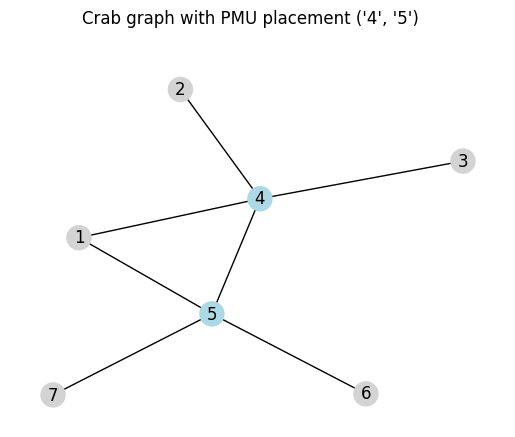

In [94]:
if __name__ == '__main__':
    ExampleGraph = CrabGraph()

    pmu_placement = ('4', '5')
    coefficients = fragile_binomial_coefficients(ExampleGraph, pmu_placement)

    print('The coefficients to the expected value polynomial on the crab graph with with PMU placement', pmu_placement, 'in binomial form are:', coefficients)
    
    ColorMap = [
        'lightblue' if vertex in pmu_placement else
        'lightgrey' for vertex in ExampleGraph
    ]

    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Crab graph with PMU placement {pmu_placement}')
    nx.draw_kamada_kawai(ExampleGraph, node_color=ColorMap, with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The following funciton abstracts the fragile_coefficients function and returns a symbolic function representation of the expected value polynomial.

In [95]:
def fragile_expected_value_polynomial(Binomial_coefficients:Sequence=list()):
    '''
    INPUT
    
    Binomial_coefficients - a list of integer coefficients
      This is the output of _fragile_coefficients()
    
    OUTPUT
    
    sympy equation object that represents the expected value function corresponding to the given coefficients
    '''

    q = sym.Symbol('q')
    equation = 0
    for index,coefficient in enumerate(Binomial_coefficients):
        equation += coefficient*((1-q)**index)*((q)**(len(Binomial_coefficients)-1-index))
    return equation

Using the previously calculated coefficients, we can generate the symbolic function for the expected value polynomial for the placement {4, 5} on the crab graph.

In [96]:
if __name__ == '__main__':
    ExampleGraph = CrabGraph()

    pmu_placement = ('4', '5')
    coefficients = fragile_binomial_coefficients(ExampleGraph, pmu_placement)
    polynomial = fragile_expected_value_polynomial(coefficients)

    print('Expected value polynomial of the crab graph with the placement', pmu_placement, 'is:', polynomial)

Expected value polynomial of the crab graph with the placement ('4', '5') is: q*(10 - 10*q) + 7*(1 - q)**2


The following forms the basis for fragile power domination. Given a graph and a particular PMU placement, this function returns a dictionary with important information about the placement.

In [97]:
def fragile_placement_attributes(Input_graph:nx.classes.graph=nx.null_graph(), Pmu_placement:Sequence=list(), Placement_id:int=None):
    '''
    INPUT
    
    Input_graph - a networkx graph
      This is the graph to inspect
    Pmu_placement - any iterable type
      This is the vertices to place PMUs on
    Placement_id - an integer
      This is optional, and is used when analyzing all placements
    
    OUTPUT
    A tuple of Placement_id and attributes, or just attributes
      If Placement_id is provided, it is returned.
      In either case, the dictionary that is returned contains key value pairs of:
         Pmu_placement, isPDS(Input_graph, Pmu_placement), fragile_binomial_coefficients(Input_graph, Pmu_placement), the integral of the expected value function on [0,1], a simplified and unsimplified representation of the expected value function
    '''
    
    attributes = dict()
    attributes['placement'] = Pmu_placement
    attributes['is pds'] = isPDS(Input_graph, Pmu_placement)
    attributes['binomial form coefficients'] = fragile_binomial_coefficients(Input_graph, Pmu_placement)
    attributes['expected value function (binomial form)'] = fragile_expected_value_polynomial(attributes['binomial form coefficients'])
    attributes['expected value function (standard form)'] = sym.expand(attributes['expected value function (binomial form)'])
    attributes['integral expected value function'] = sym.integrate(attributes['expected value function (standard form)'], sym.Symbol('q'))
    attributes['average expected value (float)'] = attributes['integral expected value function'].evalf(subs={'q': 1})
    attributes['average expected value'] = attributes['integral expected value function'].subs('q',1)
    if Placement_id != None:
        return Placement_id, attributes
    else:
        return attributes

Observe the requisite attributes for the PMU placement {4, 5} on the crab graph.

In [98]:
if __name__ == '__main__':
    ExampleGraph = CrabGraph()

    pmu_placement = ('4', '5')
    placement_attribtues = fragile_placement_attributes(ExampleGraph, pmu_placement)

    for key, value in placement_attribtues.items():
        print(f'{key}:', value)

placement: ('4', '5')
is pds: True
binomial form coefficients: [0, 10, 7]
expected value function (binomial form): q*(10 - 10*q) + 7*(1 - q)**2
expected value function (standard form): -3*q**2 - 4*q + 7
integral expected value function: -q**3 - 2*q**2 + 7*q
average expected value (float): 4.00000000000000
average expected value: 4


We now inspect all possible PMU placements with the following function.

In [99]:
def n_placement_polynomials(Input_graph:nx.classes.graph=nx.null_graph(), N:int=0, Multiplacements:bool=False):
    '''
    INPUT
    
    Input_graph - a networkx graph
      This is the graph to inspect
    N - an integer
      The number of PMUs available for a given placement
    Multiplacements - a boolean
      This determines if multisets are used
    
    OUTPUT
    pmu_placements - a dictionary
      Each subset of V(G) of order N is given a unique placement id, and is stored in pmu_placements with that key, the value is then the output of placement_attributes
    '''
    
    pmu_placements = dict()

    with multiprocessing.Pool() as pool:
    
        # Create the iterator of arguments and send it to the helper function
        argument1 = it.repeat(Input_graph)

        # If multisets are requested, then we use combinations with replacement as opposed to just combinations
        if Multiplacements:
            argument2 = it.combinations_with_replacement(Input_graph.nodes(), N)
        else:
            argument2 = it.combinations(Input_graph.nodes(), N)

        # This gives each pmu placement a unique id starting with 1
        argument3 = it.count(start=1, step=1)

        for pmu_placement_id, attributes in pool.starmap(fragile_placement_attributes, zip(argument1, argument2, argument3)):
            pmu_placements[f'placement id {pmu_placement_id}'] = attributes
    return pmu_placements

There are 28 possible PMU placements on the crab graph when allowing multiple PMUs at a single vertex. The following displays the placement attributes for each of these placements.

placement id 1
  placement ('3', '3')
  is pds False
  binomial form coefficients [0, 4, 2]
  expected value function (binomial form) q*(4 - 4*q) + 2*(1 - q)**2
  expected value function (standard form) 2 - 2*q**2
  integral expected value function -2*q**3/3 + 2*q
  average expected value (float) 1.33333333333333
  average expected value 4/3
placement id 2
  placement ('3', '4')
  is pds False
  binomial form coefficients [0, 7, 5]
  expected value function (binomial form) q*(7 - 7*q) + 5*(1 - q)**2
  expected value function (standard form) -2*q**2 - 3*q + 5
  integral expected value function -2*q**3/3 - 3*q**2/2 + 5*q
  average expected value (float) 2.83333333333333
  average expected value 17/6
placement id 3
  placement ('3', '2')
  is pds False
  binomial form coefficients [0, 4, 3]
  expected value function (binomial form) q*(4 - 4*q) + 3*(1 - q)**2
  expected value function (standard form) -q**2 - 2*q + 3
  integral expected value function -q**3/3 - q**2 + 3*q
  average expected

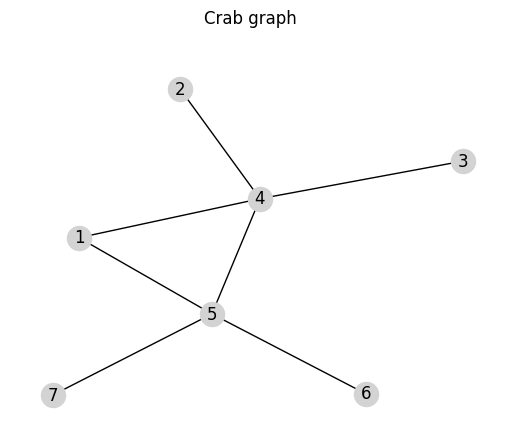

In [100]:
if __name__ == '__main__':
    ExampleGraph = CrabGraph()

    if hasattr(sys, 'ps1'):
        placements_and_attributes = pdt.n_placement_polynomials(ExampleGraph, 2, Multiplacements=True)
    else:
        placements_and_attributes = n_placement_polynomials(ExampleGraph, 2, Multiplacements=True)

    for key, value in placements_and_attributes.items():
        print(key)
        for subkey, subvalue in value.items():
            print(' ', subkey, subvalue)
            
    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Crab graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color='lightgrey', with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

By inspection, there are plenty of placements that yield identical expected value polynomials. The following function aggregates all placements that result in the same polynomial into equivalency classes.

In [101]:
def n_placement_polynomials_up_to_equivalency(Input_graph:nx.classes.graph=nx.null_graph(), N:int=0, Multiplacements:bool=False):
    '''
    INPUT
    
    Input_graph - a networkx graph
      This is the graph to inspect
    N - an integer
      The number of PMUs available for a given placement
    Multiplacements - a boolean
      This determines if multisets are used
    
    OUTPUT
    placement_polynomials_classes - a dictionary
      This dictionary is keyed with the expected value polynomial, and values are lists of placements that realize the appropriate expected number of observed vertices
    '''

    # Determine the n (multi) placement_polynomials and the set of unique funcitons corresponding to all placements
    placement_polynomials_classes = dict()
    Pmu_placements = n_placement_polynomials(Input_graph, N, Multiplacements)
    class_representatives = set(value['expected value function (standard form)'] for value in Pmu_placements.values())
    
    # For each of the unique functions, create a dictionary entry that corresponds to that function
    for representative in class_representatives:
        placement_polynomials_classes[representative] = list(value for value in Pmu_placements.values() if value['expected value function (standard form)'] == representative)
    
    # Now we sort the values by the average expected value for the polynomial (integral on [0,1])
    placement_polynomials_classes_list = sorted(list((key, value) for key, value in placement_polynomials_classes.items()), key = lambda x : x[1][0]['average expected value'])
    placement_polynomials_classes = dict()
    for key, value in placement_polynomials_classes_list:
        placement_polynomials_classes[key] = value

    # Return the equivalency classes, with the corresponding sort on the keys
    return placement_polynomials_classes

What was 28 unique placements of 2 PMUs on the crab graph, results in 10 unique expected value polynomials.

2 - 2*q**2
  placement(s) [('3', '3'), ('2', '2'), ('7', '7'), ('6', '6')]
  is pds False
  binomial form coefficients [0, 4, 2]
  expected value function (binomial form) q*(4 - 4*q) + 2*(1 - q)**2
  expected value function (standard form) 2 - 2*q**2
  integral expected value function -2*q**3/3 + 2*q
  average expected value (float) 1.33333333333333
  average expected value 4/3
-q**2 - 2*q + 3
  placement(s) [('3', '2'), ('7', '6')]
  is pds False
  binomial form coefficients [0, 4, 3]
  expected value function (binomial form) q*(4 - 4*q) + 3*(1 - q)**2
  expected value function (standard form) -q**2 - 2*q + 3
  integral expected value function -q**3/3 - q**2 + 3*q
  average expected value (float) 1.66666666666667
  average expected value 5/3
3 - 3*q**2
  placement(s) [('1', '1')]
  is pds False
  binomial form coefficients [0, 6, 3]
  expected value function (binomial form) q*(6 - 6*q) + 3*(1 - q)**2
  expected value function (standard form) 3 - 3*q**2
  integral expected value functi

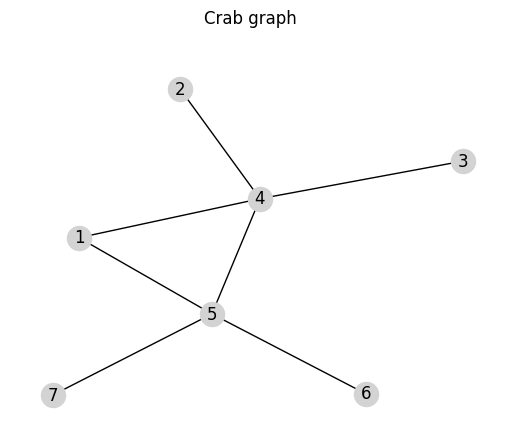

In [102]:
if __name__ == '__main__':
    ExampleGraph = CrabGraph()

    if hasattr(sys, 'ps1'):
        placements_and_attributes = pdt.n_placement_polynomials_up_to_equivalency(ExampleGraph, 2, Multiplacements=True)
    else:
        placements_and_attributes = n_placement_polynomials_up_to_equivalency(ExampleGraph, 2, Multiplacements=True)

    for key, value in placements_and_attributes.items():
        print(key)
        for subkey, subvalue in value[0].items():
            if subkey == 'placement':
                print(' ', 'placement(s)', [placement['placement'] for placement in value])
            else:
                print(' ', subkey, subvalue)
            
    fig,axes = plt.subplots(1,1)
    fig.suptitle(f'Crab graph')
    nx.draw_kamada_kawai(ExampleGraph, node_color='lightgrey', with_labels = True, ax=axes)
    if hasattr(sys, 'ps1'):
        plt.show()
    else:
        fig.show()

The following gives a standardized plot of the non-equivalent expected value polynomials along with a representative pmu placement.

In [103]:
def display_n_placement_polynomials_up_to_equivalency(Input_graph:nx.classes.graph=nx.null_graph(), N:int=0, Multiplacements:bool=False):
    '''
    INPUT
    
    Input_graph - a networkx graph
      This is the graph to inspect
    N - an integer
      The number of PMUs available for a given placement
    Multiplacements - a boolean
      This determines if multisets are used
    
    OUTPUT
      No output is given - matplotlib is used to display each of the functions in the requested (multi) placement_polynomials
    '''

    #Determine the placement_polynomials classes
    placement_polynomials_classes = n_placement_polynomials_up_to_equivalency(Input_graph, N, Multiplacements)
    
    q = sym.Symbol('q')

    # Setup the matplotlib parameters
    # The first is colors and line types
    colors = list(mpl.colors.TABLEAU_COLORS.keys())
    line_type_dict = {'solid':(0, ()), 'densely dotted':(0, (1, 1)), 'densely dashed':(0, (5, 1))}
    line_styles = it.cycle(it.product(colors, line_type_dict.keys()))

    # Then we will be using 1 grid, and giving it its title
    fig,axes = plt.subplots(nrows=1, ncols=1)
    x_values = np.linspace(0, 1, 100)
    plt.title(f'{N}-{"multi-" if Multiplacements else ""}placement_polynomials')

    # Begin by printing the n (multi) placement_polynomials to the console
    print(f'{N}-{"multi-" if Multiplacements else ""}placement_polynomials ({len(placement_polynomials_classes)} items)')

    # For each of the representative polynomials, we plot it and print out the placement attributes to the console
    for key, value in placement_polynomials_classes.items():

        # For this representative, we print out the placement attributes, allong with the assigned line type and color on this plot
        color, line_style_name = next(line_styles)
        line_style = line_type_dict[line_style_name]
        print(' ', key)
        for subkey, subvalue in value[0].items():

            # If we would be printing out the placement corresponding to the representative polynomial, we instead print out all of the ones corresponding to that representative
            if subkey == 'placement':
                print(' ', ' ', 'placement(s)', [placement['placement'] for placement in value])

            # Otherwise we print the attribute
            else:
                print(' ', ' ', subkey, subvalue)
        print(' ', ' ', 'color', color)
        print(' ', ' ', 'line style', line_style_name)

        # Now we may plot the representative function, along with assigning it the correct display name for the legend
        function = sym.lambdify(q, value[0]['expected value function (standard form)'], modules=['numpy'])
        y_values = function(x_values)
        example_placement = '(' + ','.join(f'{item}' for item in sorted(int(item) for item in value[0]['placement'])) + ')'
        axes.plot(x_values, y_values, color=color, linestyle=line_style, label=f'Example placement: {example_placement}')

    # Now we show the legend and show the plot
    plt.legend()
    plt.show()
    return

Using this function, we see each representative polynomial is printed alongside its placement attributes with the addition of two new parameters: color and line type. These correspond to the appropriate values displayed in the generated plot.

2-multi-placement_polynomials (10 items)
  2 - 2*q**2
    placement(s) [('3', '3'), ('2', '2'), ('7', '7'), ('6', '6')]
    is pds False
    binomial form coefficients [0, 4, 2]
    expected value function (binomial form) q*(4 - 4*q) + 2*(1 - q)**2
    expected value function (standard form) 2 - 2*q**2
    integral expected value function -2*q**3/3 + 2*q
    average expected value (float) 1.33333333333333
    average expected value 4/3
    color tab:blue
    line style solid
  -q**2 - 2*q + 3
    placement(s) [('3', '2'), ('7', '6')]
    is pds False
    binomial form coefficients [0, 4, 3]
    expected value function (binomial form) q*(4 - 4*q) + 3*(1 - q)**2
    expected value function (standard form) -q**2 - 2*q + 3
    integral expected value function -q**3/3 - q**2 + 3*q
    average expected value (float) 1.66666666666667
    average expected value 5/3
    color tab:blue
    line style densely dotted
  3 - 3*q**2
    placement(s) [('1', '1')]
    is pds False
    binomial form coe

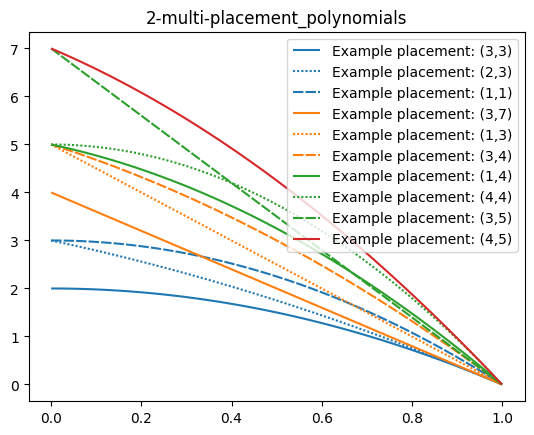

In [104]:
if __name__ == '__main__':
    ExampleGraph = CrabGraph()
    if hasattr(sys, 'ps1'):
        pdt.display_n_placement_polynomials_up_to_equivalency(ExampleGraph, 2, Multiplacements=True)
    else:
        display_n_placement_polynomials_up_to_equivalency(ExampleGraph, 2, Multiplacements=True)